![Cardio Image](https://plus.unsplash.com/premium_photo-1663127034054-4d4e1d8712e2?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8N3x8ZnJhdWR8ZW58MHx8MHx8&auto=format&fit=crop&w=500&q=60)
<h1>Blocker fraud company </h1>

## 0.0 - Business undertanding

**The Blocker Fraud Company**

- Financial transactions' fraud detection specialized company.
- The Blocker Fraud service ensures fraudulent transactions block.
- Business Model: service's performance monetization.

**Expansion Strategy in Brazil**

1. The company receives 25% of each transaction value truly detected as fraud.
2. The company receives 5% of each transaction value detected as fraud, however the transaction is legitimate.
3. The company gives back 100% of the value for the customer in each transaction detected as legitimate, however the transaction is actually a fraud.

**Goal**

- Create a model with high accuracy and precision with respect to transactions' fraud detection.

**Deliverables**

- Deployed model with API access. The API must inform "Fraud" or "Legitimate" when the transaction is inputed.
- A Readme about how to use the tool.
- Model performance and results report with respect to profit and loss. The following questions must be answered:

    - What is the model's precision and accuracy?
    - What is the model's reliability with respect to transactions' classification as legitimate or fraudulent?
    - What is the company's forecasted revenue if the model classifies 100% of the transactions?
    - What is the company's forecasted loss in case of model's failure?
    - What is the Blocker Fraud Company forecasted profit using the model?

## 1.0 - Imports

### 1.1 - Libraries

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from random import sample as sp
from pandas_profiling      import ProfileReport #conda install -c conda-forge ydata-profiling

# ## Database 
from sqlalchemy import create_engine
import sqlite3

# ## Data Transformation
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder,OneHotEncoder

# ## Visualization
# import seaborn as sns
# from seaborn import pairplot
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# from scipy.stats import pointbiserialr

# ## Machine Learning, selection and split
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
# from sklearn.feature_selection import RFE
# from sklearn.decomposition          import PCA
# from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
# from sklearn.linear_model import LogisticRegression 
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score,RandomizedSearchCV,GridSearchCV
# import pickle

# ## Configurations
# from IPython.display import Image
# from IPython.display import HTML
# import warnings



### 1.2 - Funcions

In [15]:
# # Calculating Scores to classification 
# def metrics_score(y_valid, y_hat, mdl_name):
#     '''
#         y_hat:    is the prediction array
#         y_valid:  is the true targe array or series
#         mdl_name: is the name of machine learning model
        
#         Accuracy formula  -->   accuracy   = np.mean(y_hat == y_valid)
#         Precision formula -->   precision  = positive_true/(positive_true+positive_false)      
#         Recall formula    -->   recall     = positive_true/(positive_true+negative_false)
        
#         Return -->> mdl_name, accuracy, precision, recall
        
#     '''
#     accuracy = accuracy_score(y_valid, y_hat)
#     precision = precision_score(y_valid, y_hat)
#     recall = recall_score(y_valid, y_hat)
#     F1_score = f1_score(y_valid, y_hat)

    
#     return pd.DataFrame([[mdl_name, accuracy, precision, recall,F1_score]], 
#                         columns=['mdl_name', 'accuracy', 'precision', 'recall', 'F1_score'
#                                  ])
    


# # Jupyter configuring to better experience
# def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
        
#     plt.style.use('bmh')
#     plt.rcParams['figure.figsize'] = [25,9]
#     plt.rcParams['font.size'] = 24
    
#     display(HTML('<style>.container{width:100% !important; }</style>'))
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.set_option('display.expand_frame_repr', False)
    
#     sns.set()
# jupyter_settings()  


# def highlight_max(s):
#     '''
#     highlight the maximum in a Series yellow.
#     '''
#     is_max = s == s.max()
#     return ['background-color: yellow' if v else '' for v in is_max]

# # To hide warning messages
# warnings.filterwarnings('ignore')


### 1.3 - Data Collect - CSV

In [16]:
# Loading dataset
# from google import colab as cl
# file_upload=cl.files.upload()
#df = pd.read_csv('/content/cardio_train.csv', sep=';')
df = pd.read_csv(r'C:\Users\Utente77\repos\blocker_fraud_company_PA002\datasets\PS_20174392719_1491204439457_log.csv', sep=',')

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 1.5 - Creating Datawerehouse

##### 1.5.1 - Rename Columns

In [18]:
# Old columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
# Rewriting columns names and replace then
new_col = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']
df.columns = new_col
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

##### 1.5.2 - Database

In [20]:
# creating database
path_local="C:/Users/Utente77/repos/blocker_fraud_company_PA002/datasets/"
engine_db = create_engine(f"sqlite:////{path_local}/ccd.db", echo=False)
conn = sqlite3.Connection('blocker_fraud.db')
cursor = conn.cursor()

# create table
query = '''CREATE TABLE IF NOT EXISTS fraud(
                                step INTEGER,
                                type TEXT,
                                amount INTEGER,
                                nameOrig TEXT,
                                oldbalanceOrg INTEGER,
                                newbalanceOrig INTEGER,
                                nameDest TEXT,
                                oldbalanceDest INTEGER,
                                newbalanceDest INTEGER,
                                isFraud INTEGER,
                                isFlaggedFraud INTEGER
                                
                                )'''

cursor.execute(query)
#engine = engine_db()
df.to_sql('fraud', con=conn, if_exists='append', index=False)



6362620

#### 1.5.3 - Data Collect from Database

In [21]:
# Selecting data
query="""
    SELECT *
    FROM fraud;

"""
df=pd.read_sql_query(query,conn)


## 2.0 - Descriptive Analysis

### 2.1 - Dimensions

In [9]:
# Printing the data dimensions, how much rows and columns
print(f'{df.shape[0]} linhas.')
print(f'{df.shape[1]} colunas.')

6362620 linhas.
11 colunas.


### 2.2 - Datatype and NaN fillout

In [10]:
# Columns Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
aux=df.isna().sum().sort_values(ascending=False)
aux1=df.isna().sum().sort_values(ascending=False)/df.shape[0]*100

na=pd.concat([aux,aux1],axis=1)
na.columns=['NaN', 'NaN %']
na

,NaN,NaN %
step,0,0.0
type,0,0.0
amount,0,0.0
nameOrig,0,0.0
oldbalanceOrg,0,0.0
newbalanceOrig,0,0.0
nameDest,0,0.0
oldbalanceDest,0,0.0
newbalanceDest,0,0.0
isFraud,0,0.0


In [12]:
#Image('/content/Cardio_Disease.png')
Image(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\img\Cardio_Disease.png')

NameError: name 'Image' is not defined

### 2.3 - Data Description

In [13]:
# profile=ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file(r"C:\Users\Utente77\repos\cardio_catch_disease_PA001\img\report.html")
# profile

In [14]:
# Descriptive statistics 

describe = df.describe().T.drop('id', axis=0)
describe['range'] = describe['max'] - describe['min']
describe['median'] = df.apply( np.median )
describe['kurtosis'] = df.apply( kurtosis )
describe['skew'] = df.apply( skew )
describe

,count,mean,std,min,25%,50%,75%,max,range,median,kurtosis,skew
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0,12915.0,19703.0,-0.823474,-0.307049
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0,1.0,1.0,-1.601906,0.630947
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0,195.0,165.0,7.942999,-0.642174
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0,190.0,72.0,2.586555,1.012048
hight_pressure,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0,16170.0,120.0,7579.533229,85.294386
low_pressure,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0,11070.0,80.0,1425.812650,32.113395
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0,2.0,1.0,0.993745,1.587089
glucose,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0,2.0,1.0,4.293985,2.397410
smoker,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6.443704,2.905805
alcohol,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13.654064,3.956522


### ***Problematics***
- age in days
- hight_pressure min above 0
- low_pressure min above 



## 3.0 - Feature Engineering

In [15]:
df1=df.copy()

In [16]:
# age - change days to year old
df1['age'] = (df1['age'] / 365).astype('int')

# height - change centimeters to meters
df1['height'] = (df1['height'] / 100)

<h1>BMI Levels</h1>

![Cardio Image](https://www.builtlean.com/wp-content/uploads/2013/06/Bmi-chart-1.jpg)


In [17]:
# BMI calculus and slices in four levels
df1['bmi'] = (df1['weight']/(df1['height'] * df1['height']))
df1['bmi_level'] = df1['bmi'].apply(lambda x: 
                                              0 if x <= 18.5 else
                                              1      if x >  18.5 and x <= 24.9 else
                                              2  if x >= 25.0 and x <= 29.9 else
                                              3)

<h1>Diastolic and systolic blood pressure</h1>

![Cardio Image](https://www.bloomsburysurgery.nhs.uk/media/content/images/bp-range-chart.jpg)


In [18]:
# Hypertension and Hipotension binary
df1['hypertension'] = df1.apply(lambda x: 1 if x[4] >=140 and x[5] >= 90 else 0, axis=1)
df1['hypotension'] = df1.apply(lambda x: 1 if x[4] <=90 and x[5] <= 60 else 0, axis=1)

In [19]:
# A difference between systolic and diastolic arterial pressure, 

df1['difference'] = df1['hight_pressure'] - df1['low_pressure'] # A difference between systolic and diastolic arterial pressure
df1['convergent'] = df1['difference'].apply(lambda x: 1 if x <= 30 else 0) # lesser than 30mmhg called convergent 
df1['divergent'] = df1['difference'].apply(lambda x: 1 if x >= 60 else 0)# and upper than 60mmhg called divergent 

In [20]:
# Slicing ages with three ranges
df1['age_range'] = df1['age'].apply(lambda x: 1    if x <= 50 
                                                   else 2   if x >= 51 and x <= 59 
                                                   else 3 if x >= 60 
                                                   else x)

In [21]:
df1['weight_range'] = df1['weight'].apply(
    lambda x:   0.50 if x <= 50  else
                0.75 if x >= 51  and x <= 75 else
                1.00 if x >= 76  and x <= 100 else
                1.25 if x >= 101 and x <= 125 else
                1.50 if x >= 126 and x <= 150 else
                1.75 if x >= 151 and x <= 175 else 2.00)

In [22]:
# Descriptive statistics after feature engineer 

describe = df1.describe().T.drop('id', axis=0)
describe['range'] = describe['max'] - describe['min']
describe['median'] = df1.apply( np.median )
describe['kurtosis'] = df1.apply( kurtosis )
describe['skew'] = df1.apply( skew )
describe

,count,mean,std,min,25%,50%,75%,max,range,median,kurtosis,skew
age,70000.0,52.840671,6.766774,29.000000,48.000000,53.000000,58.000000,64.000000,35.000000,53.000000,-0.819008,-0.305737
gender,70000.0,1.349571,0.476838,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,-1.601906,0.630947
height,70000.0,1.643592,0.082101,0.550000,1.590000,1.650000,1.700000,2.500000,1.950000,1.650000,7.942999,-0.642174
weight,70000.0,74.205690,14.395757,10.000000,65.000000,72.000000,82.000000,200.000000,190.000000,72.000000,2.586555,1.012048
hight_pressure,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000,16170.000000,120.000000,7579.533229,85.294386
low_pressure,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000,11070.000000,80.000000,1425.812650,32.113395
cholesterol,70000.0,1.366871,0.680250,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.993745,1.587089
glucose,70000.0,1.226457,0.572270,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,4.293985,2.397410
smoker,70000.0,0.088129,0.283484,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.443704,2.905805
alcohol,70000.0,0.053771,0.225568,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,13.654064,3.956522


## 4.0 - Data Filtering

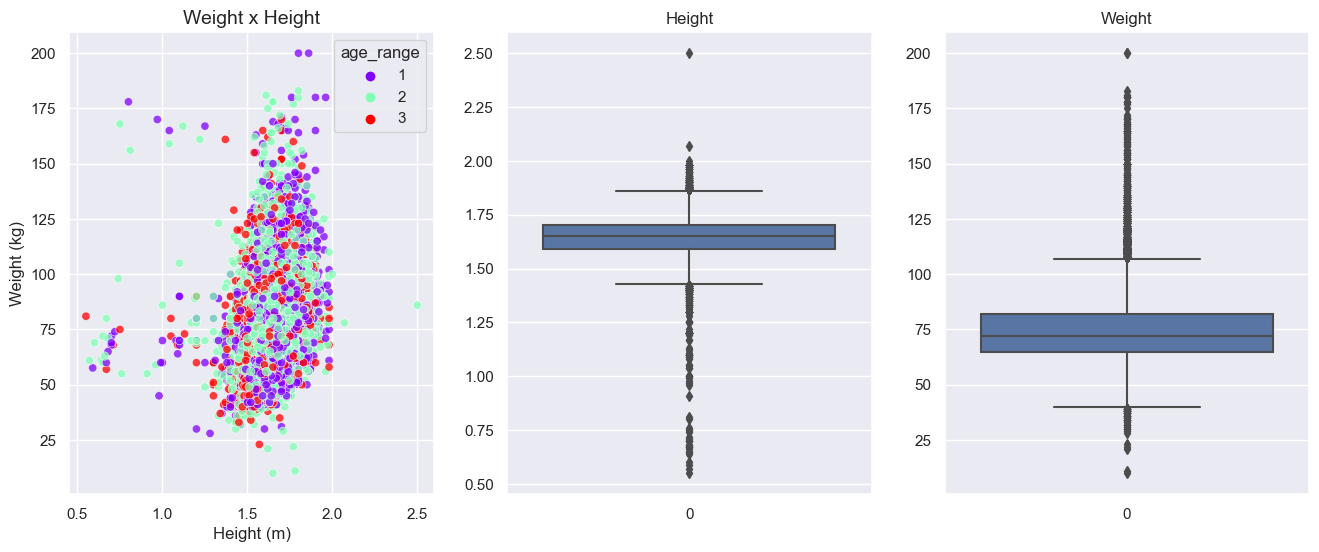

In [23]:
# sets plot size
plt.figure(figsize=(16,6))
# plots scatterplot
plt.subplot(1,3,1)
sns.scatterplot(x='height', y='weight', data=df1, hue='age_range', palette='rainbow', alpha=0.75)
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Height", fontsize=14)

plt.subplot(1,3,2)
plt.title('Height')
sns.boxplot(df1['height']);

plt.subplot(1,3,3)
plt.title('Weight')
sns.boxplot(df1['weight']);

# displays the plot
plt.show()

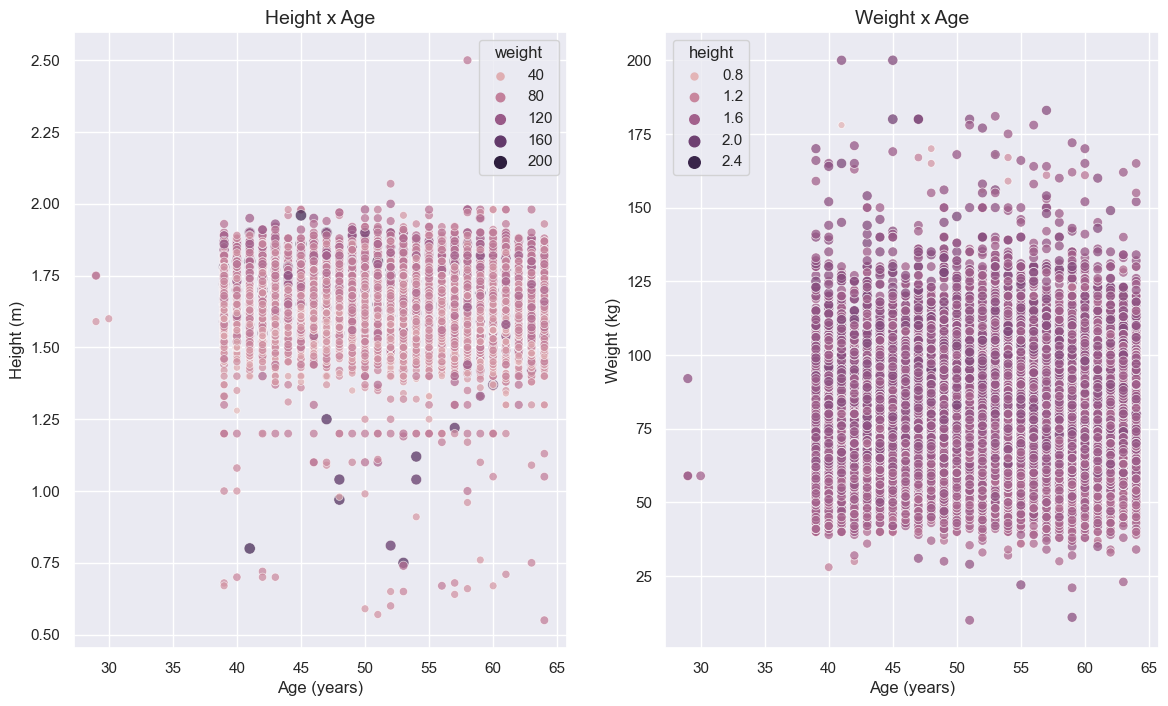

In [24]:
# sets plot size
plt.figure(figsize=(14,8))

# plots scatterplot
plt.subplot(1,2,1)
sns.scatterplot(x='age', y='height', data=df1, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Height (m)")
plt.title("Height x Age", fontsize=14)

# plots scatterplot
plt.subplot(1,2,2)
sns.scatterplot(x='age', y='weight', data=df1, hue='height', size='height', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Weight (kg)")
plt.title("Weight x Age", fontsize=14)

# displays the plot
plt.show()

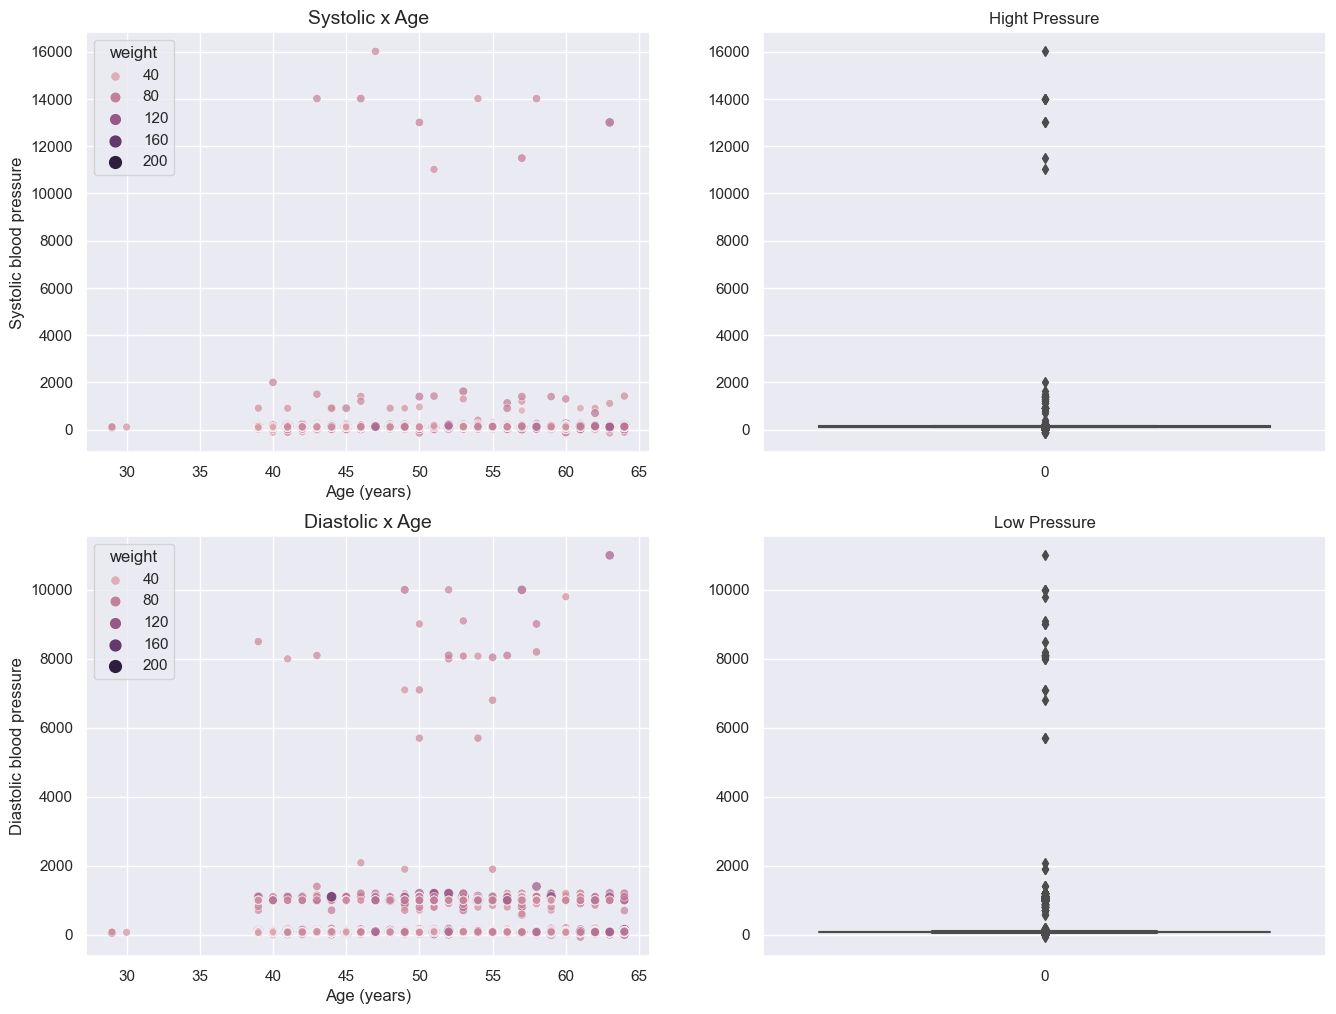

In [25]:
# sets plot size
plt.figure(figsize=(16,12))

# plots scatterplot
plt.subplot(2,2,1)
sns.scatterplot(x='age', y='hight_pressure', data=df1, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Systolic blood pressure")
plt.title("Systolic x Age", fontsize=14)

plt.subplot(2,2,3)
sns.scatterplot(x='age', y='low_pressure', data=df1, hue='weight', size='weight', alpha=0.75)
plt.xlabel("Age (years)")
plt.ylabel("Diastolic blood pressure")
plt.title("Diastolic x Age", fontsize=14)

plt.subplot(2,2,2)
plt.title('Hight Pressure')
sns.boxplot(df1['hight_pressure']);

plt.subplot(2,2,4)
plt.title('Low Pressure')
sns.boxplot(df1['low_pressure']);

# displays the plot
plt.show()

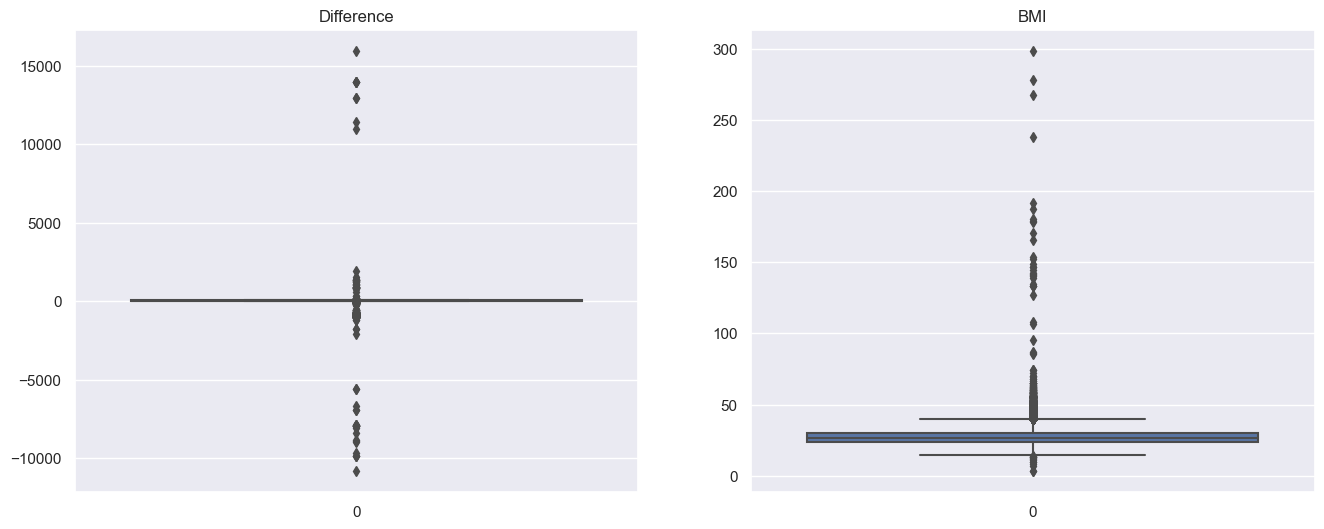

In [26]:
# Boxplot from numerical data
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Difference')
sns.boxplot(df1['difference']);

plt.subplot(1,2,2)
plt.title('BMI')
sns.boxplot(df1['bmi']);



#### 2.3.1  Inconsistent numbers of **hight pressure** and **low pressure** 


In [27]:
# calculates Q1, Q3 and IQR
Q1 = np.quantile(df1['hight_pressure'], .25)
Q3 = np.quantile(df1['hight_pressure'], .75)
IQR = Q3 - Q1

# calculates the outliers boundaries through statistical relationship
low_outliers_h = Q1 - 1.5 * IQR
high_outliers_h = Q3 + 1.5 * IQR

print("Systolic boundaries for outliers")
print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlow_outliers = {low_outliers_h}\nhigh_outliers = {high_outliers_h}")


# calculates Q1, Q3 and IQR
Q1 = np.quantile(df1['low_pressure'], .25)
Q3 = np.quantile(df1['low_pressure'], .75)
IQR = Q3 - Q1

# calculates the outliers boundaries through statistical relationship
low_outliers_l = Q1 - 1.5 * IQR
high_outliers_l = Q3 + 1.5 * IQR

print("\nDiastolic boundaries for outliers")
print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlow_outliers = {low_outliers_l}\nhigh_outliers = {high_outliers_l}")

Systolic boundaries for outliers
Q1 = 120.0
Q3 = 140.0
IQR = 20.0
low_outliers = 90.0
high_outliers = 170.0

Diastolic boundaries for outliers
Q1 = 80.0
Q3 = 90.0
IQR = 10.0
low_outliers = 65.0
high_outliers = 105.0


In [28]:

print(f'''{df1[(df1['low_pressure'] < low_outliers_l) | (
    df1['low_pressure'] > high_outliers_l)].shape[0]} inconsistent rows on low_pressure.''')
print(f'''{df1[(df1['hight_pressure'] < low_outliers_h) | (
    df1['hight_pressure'] > high_outliers_h)].shape[0]} inconsistent rows on hight_pressure. ''')

# #filtering data without inconsistence data
df1 = df1[(df1['low_pressure'] >= 20) & (df1['low_pressure'] <= 150)]
df1 = df1[(df1['hight_pressure'] >= 40) & (df1['hight_pressure'] <= 300)]

4632 inconsistent rows on low_pressure.
1435 inconsistent rows on hight_pressure. 


## 5.0 - EDA - Explolatory Data Analysis

In [29]:
df2=df1.copy()


### 5.1 - Univariate Analysis

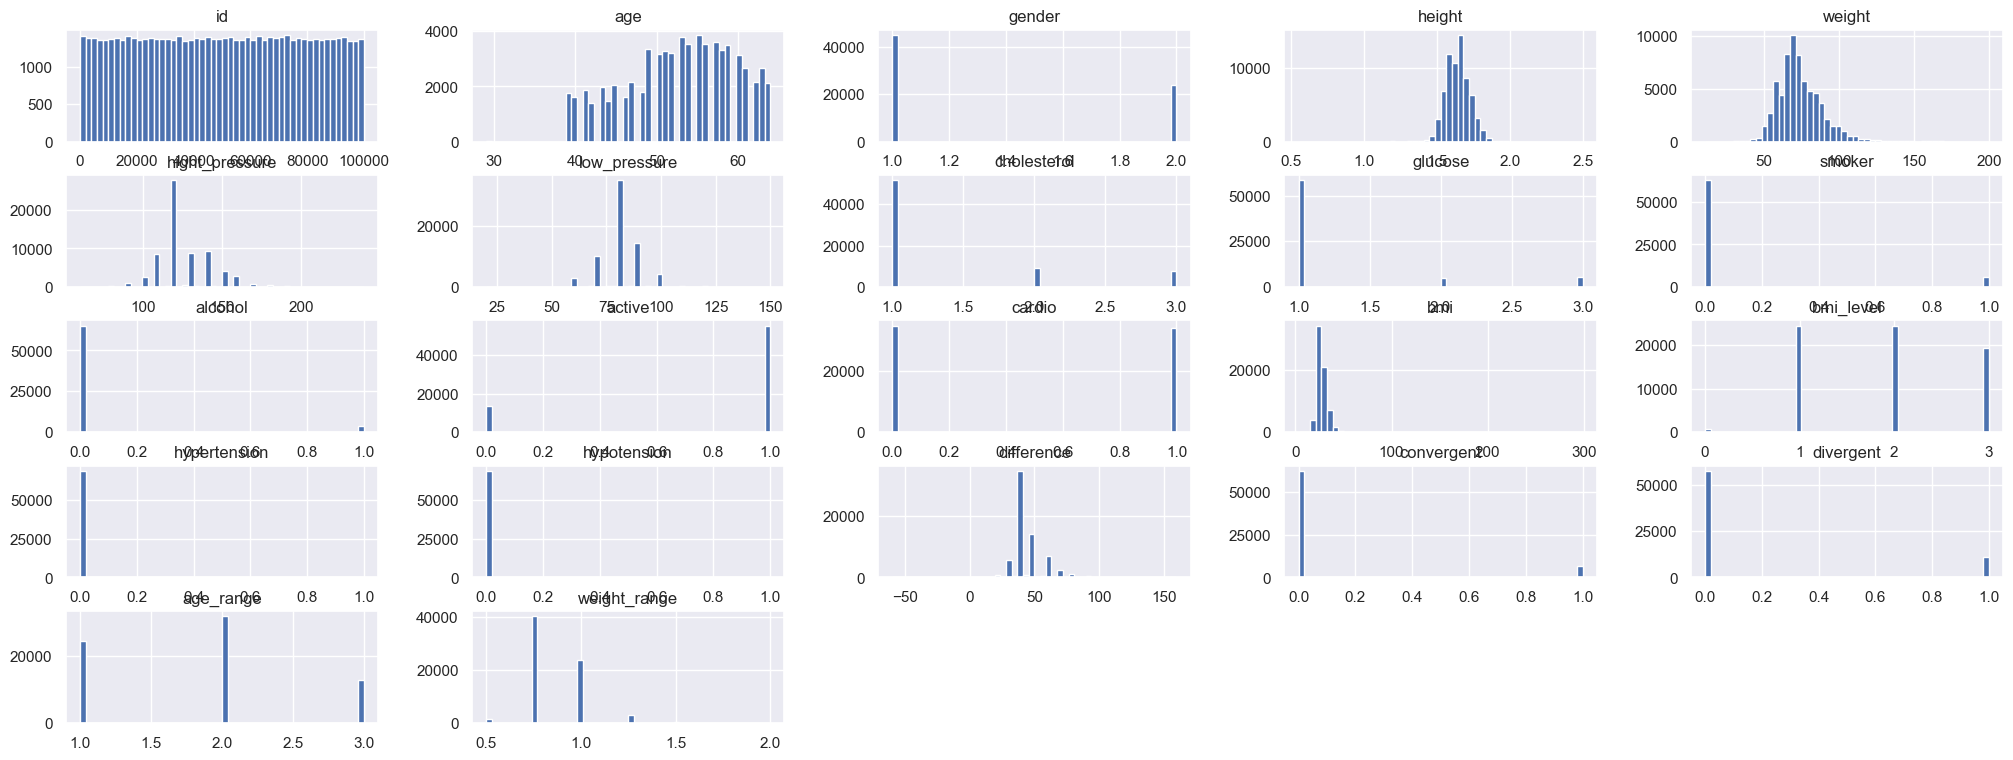

In [30]:
# Distribution from all data
df2.hist(bins=50);

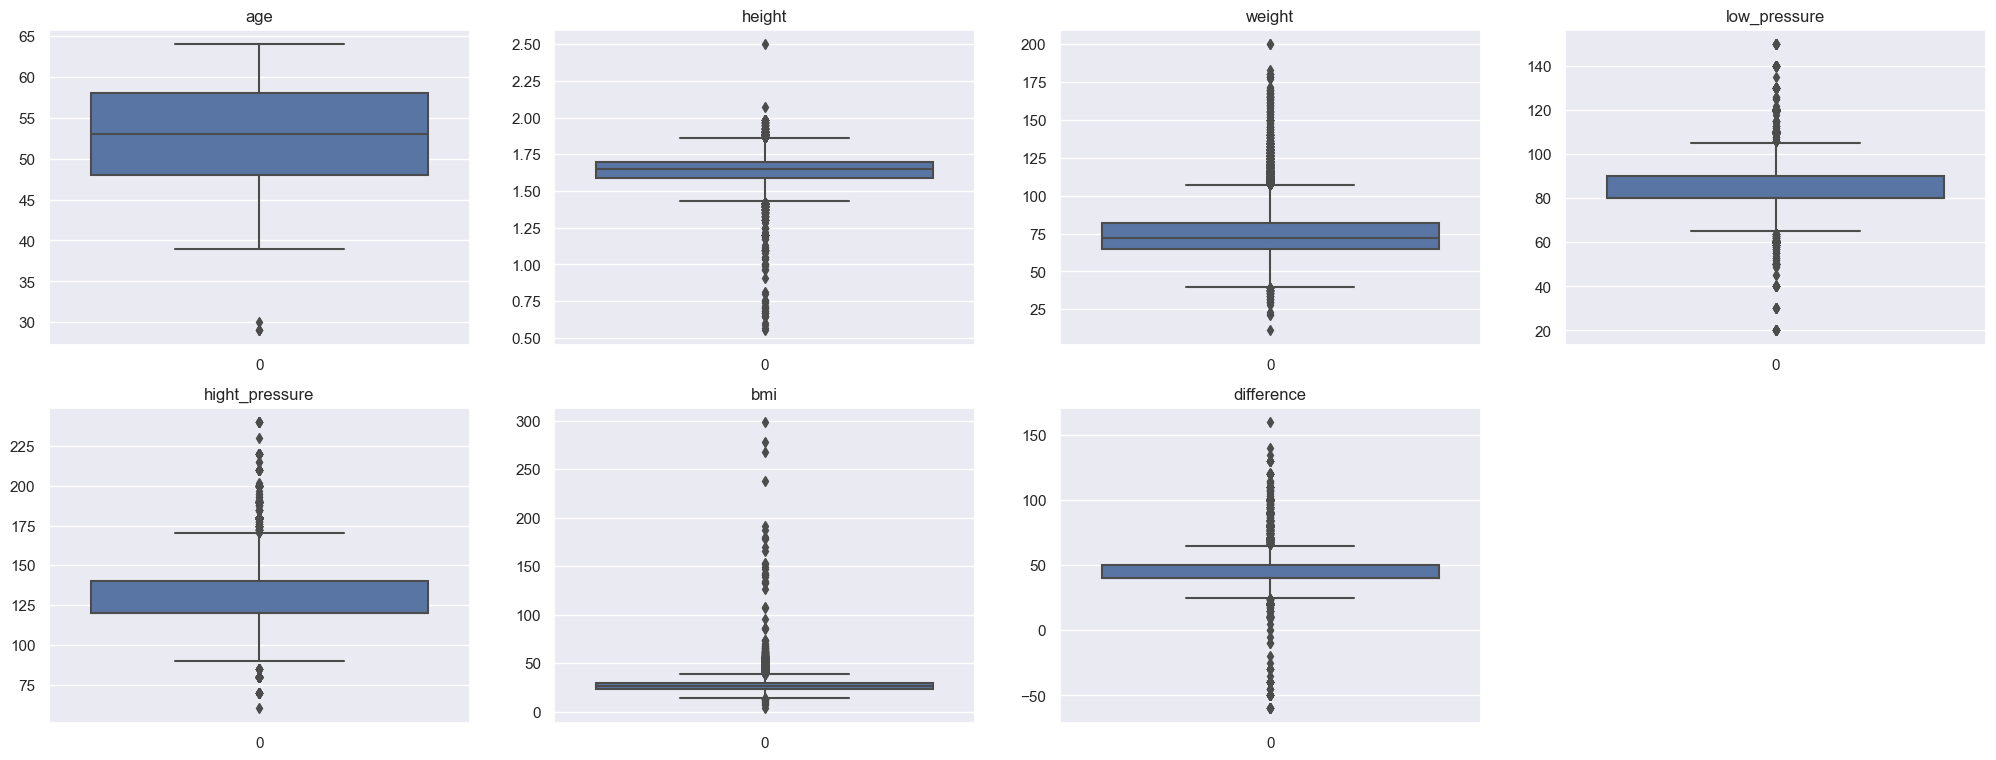

In [31]:
# Distribution from all data
plt.subplot(2,4,1)
plt.title('age')
sns.boxplot(df2['age']);

plt.subplot(2,4,2)
plt.title('height')
sns.boxplot(df2['height']);

plt.subplot(2,4,3)
plt.title('weight')
sns.boxplot(df2['weight']);

plt.subplot(2,4,4)
plt.title('low_pressure')
sns.boxplot(df2['low_pressure']);

plt.subplot(2,4,5)
plt.title('hight_pressure')
sns.boxplot(df2['hight_pressure']);

plt.subplot(2,4,6)
plt.title('bmi')
sns.boxplot(df2['bmi']);

plt.subplot(2,4,7)
plt.title('difference')
sns.boxplot(df2['difference']);


In [32]:
df2.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'hight_pressure',
       'low_pressure', 'cholesterol', 'glucose', 'smoker', 'alcohol', 'active',
       'cardio', 'bmi', 'bmi_level', 'hypertension', 'hypotension',
       'difference', 'convergent', 'divergent', 'age_range', 'weight_range'],
      dtype='object')

In [33]:
df2.isna().sum()

id                0
age               0
gender            0
height            0
weight            0
hight_pressure    0
low_pressure      0
cholesterol       0
glucose           0
smoker            0
alcohol           0
active            0
cardio            0
bmi               0
bmi_level         0
hypertension      0
hypotension       0
difference        0
convergent        0
divergent         0
age_range         0
weight_range      0
dtype: int64

### 5.2 - Bivariate Analysis

##### 5.2.1 - How more active, less diseases
False

In [34]:
df2[['cardio','active']].groupby('cardio').value_counts(normalize=True ).reset_index()

,cardio,active,0
0,0,1,0.817983
1,0,0,0.182017
2,1,1,0.788458
3,1,0,0.211542


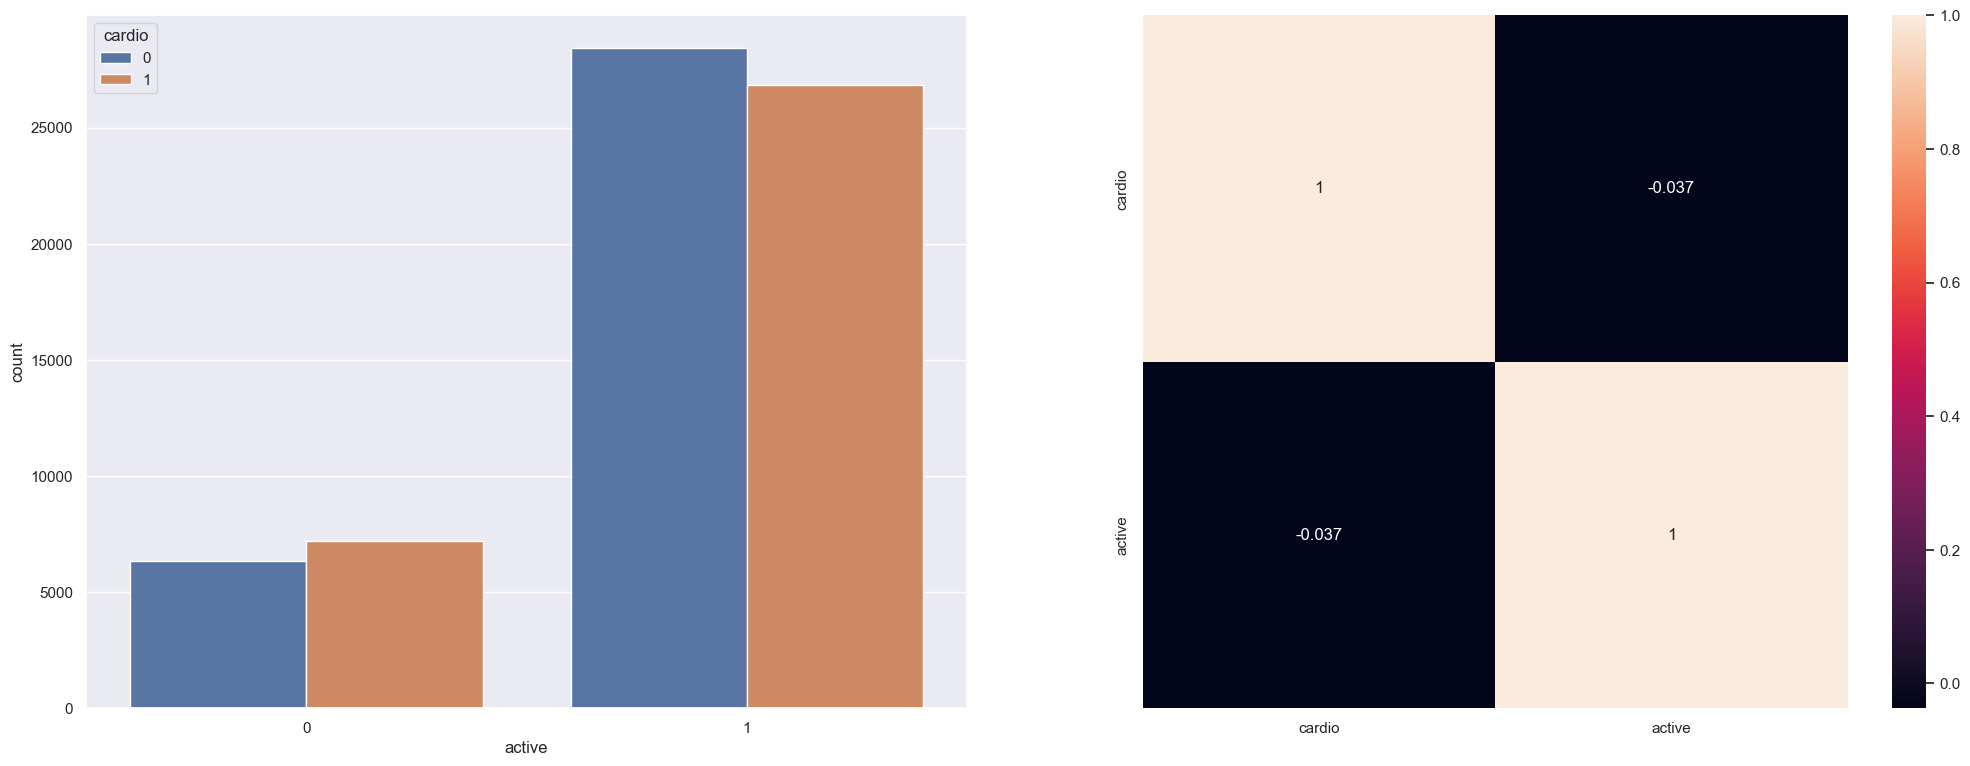

In [35]:
subplot(1,2,1)
sns.countplot(hue='cardio', x='active', data=df2);

subplot(1,2,2)
sns.heatmap(df2[['cardio','active']].corr(method='pearson'), annot=True);


##### 5.2.2 - Cholesterou over level I, more risk
 True (perarson >0.2)

In [36]:
df2[['cardio','cholesterol']].groupby('cardio').value_counts(normalize=True ).reset_index()

,cardio,cholesterol,0
0,0,1,0.837986
1,0,2,0.108220
2,0,3,0.053793
3,1,1,0.660163
4,1,3,0.176692
5,1,2,0.163145


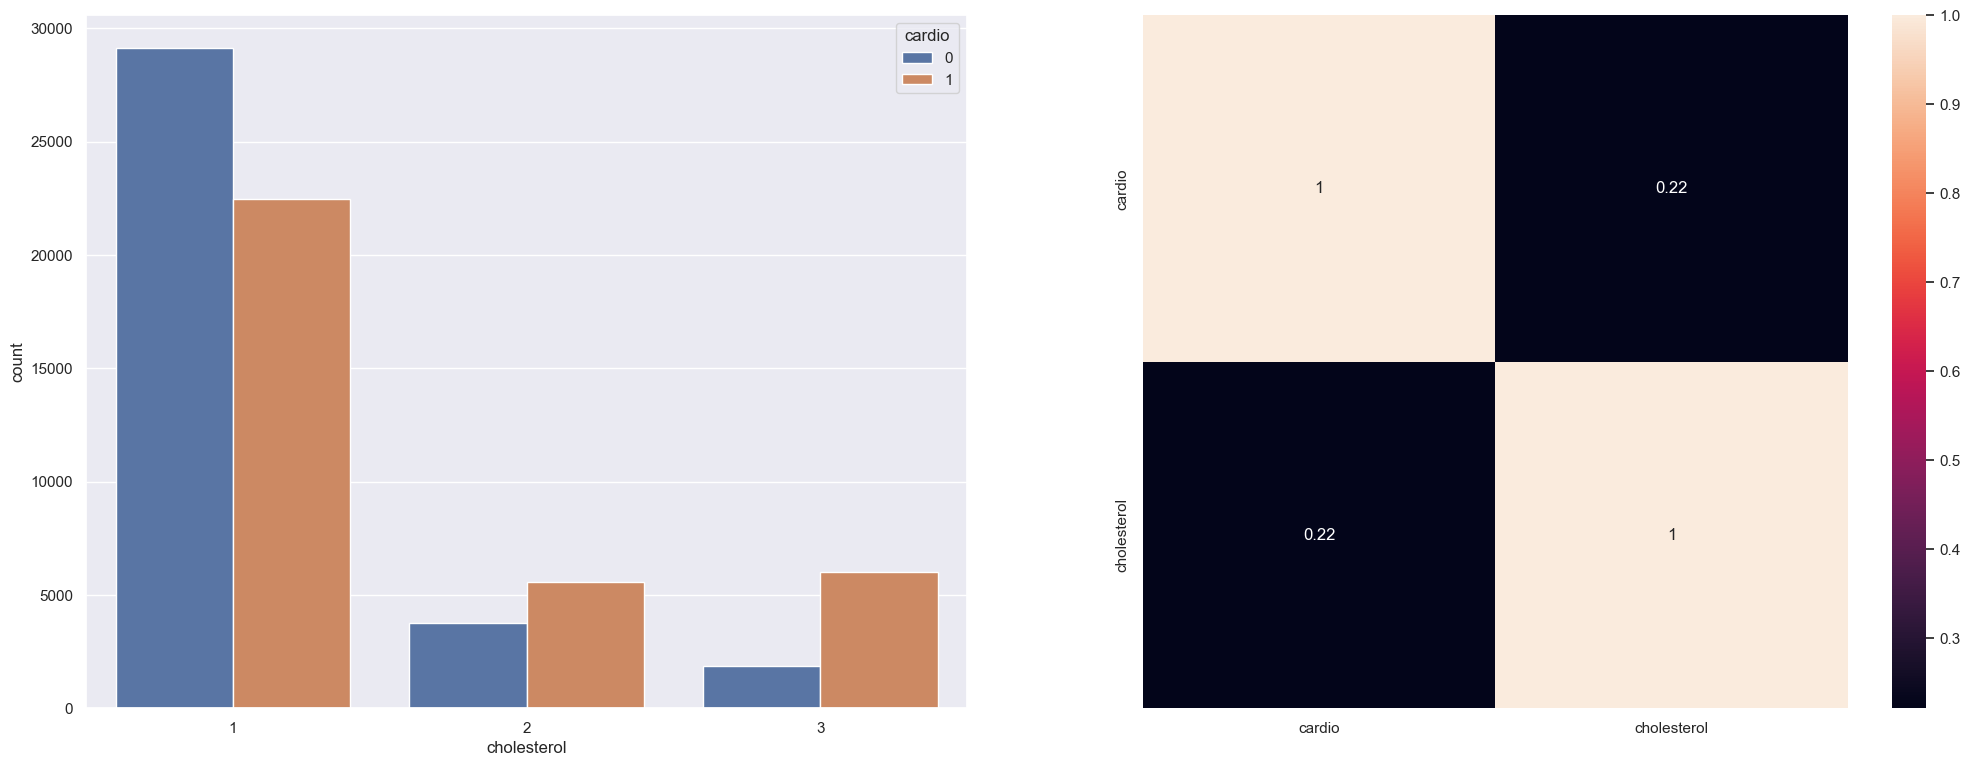

In [37]:
plt.subplot(1,2,1)
sns.countplot(hue='cardio', x='cholesterol', data=df2);

plt.subplot(1,2,2)
sns.heatmap(df2[['cardio','cholesterol']].corr(method='pearson'), annot=True);


##### 5.2.3 - How more clucose, more risk
   False

The correlation it's so low, insignificat to model

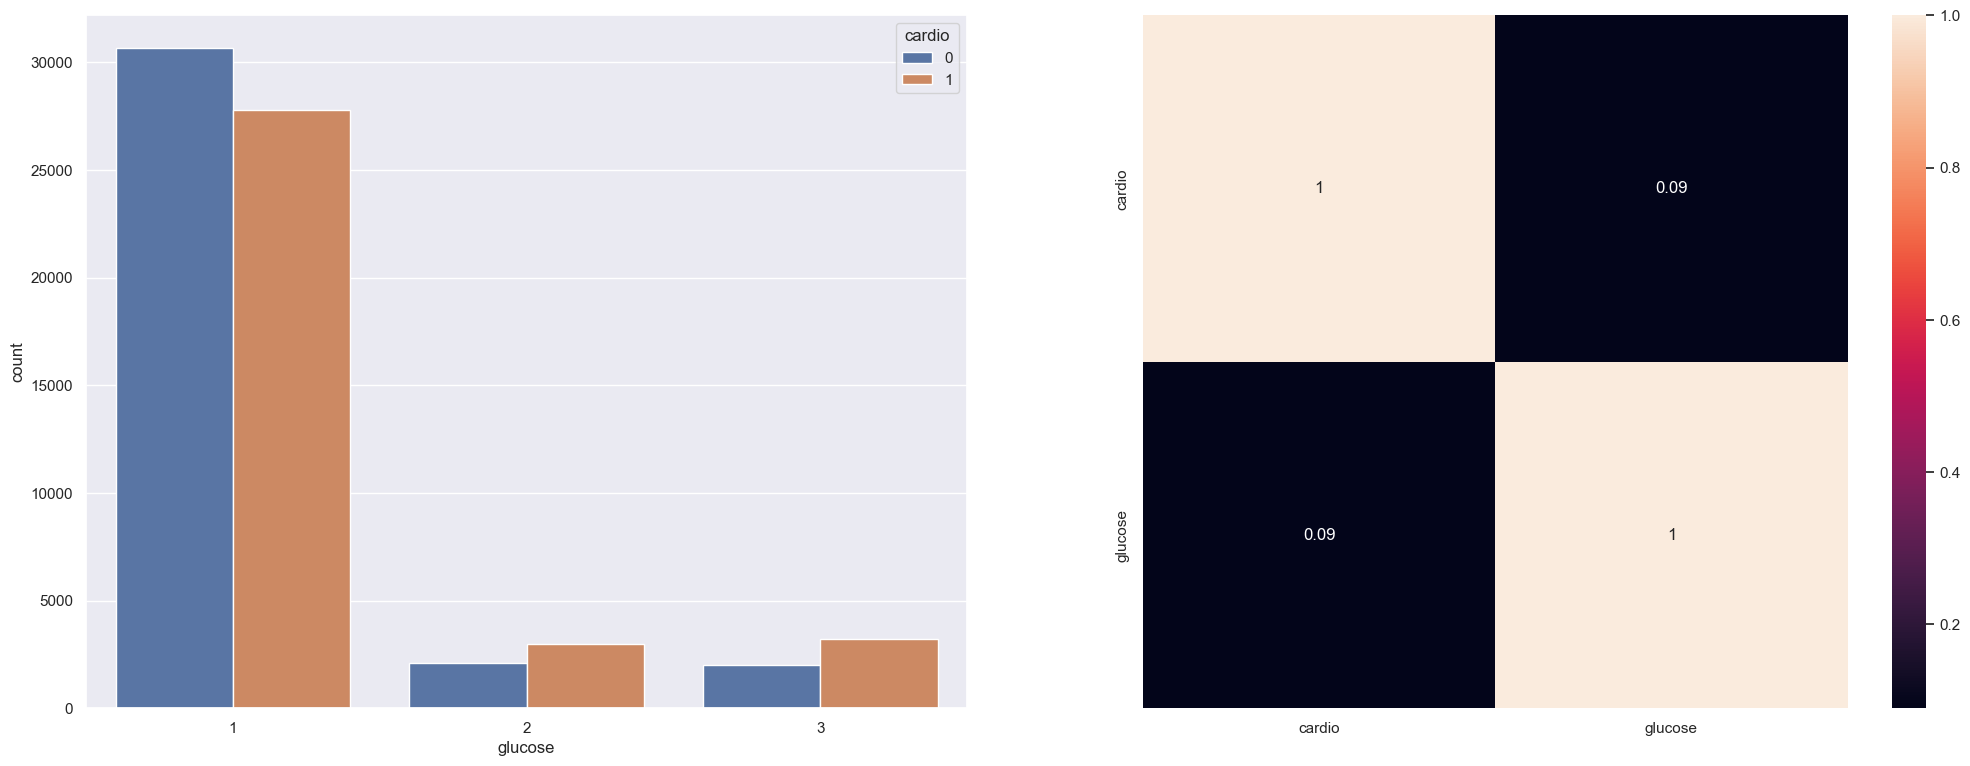

In [38]:
plt.subplot(1,2,1)
sns.countplot(hue='cardio', x='glucose', data=df2);

plt.subplot(1,2,2)
sns.heatmap(df2[['cardio','glucose']].corr(method='pearson'), annot=True);

##### 5.2.4 - How more older, more risk
   True (perarson >0.2)

following the years it's more count and more avarage pear year old, low correlation, but, probly it's important to model

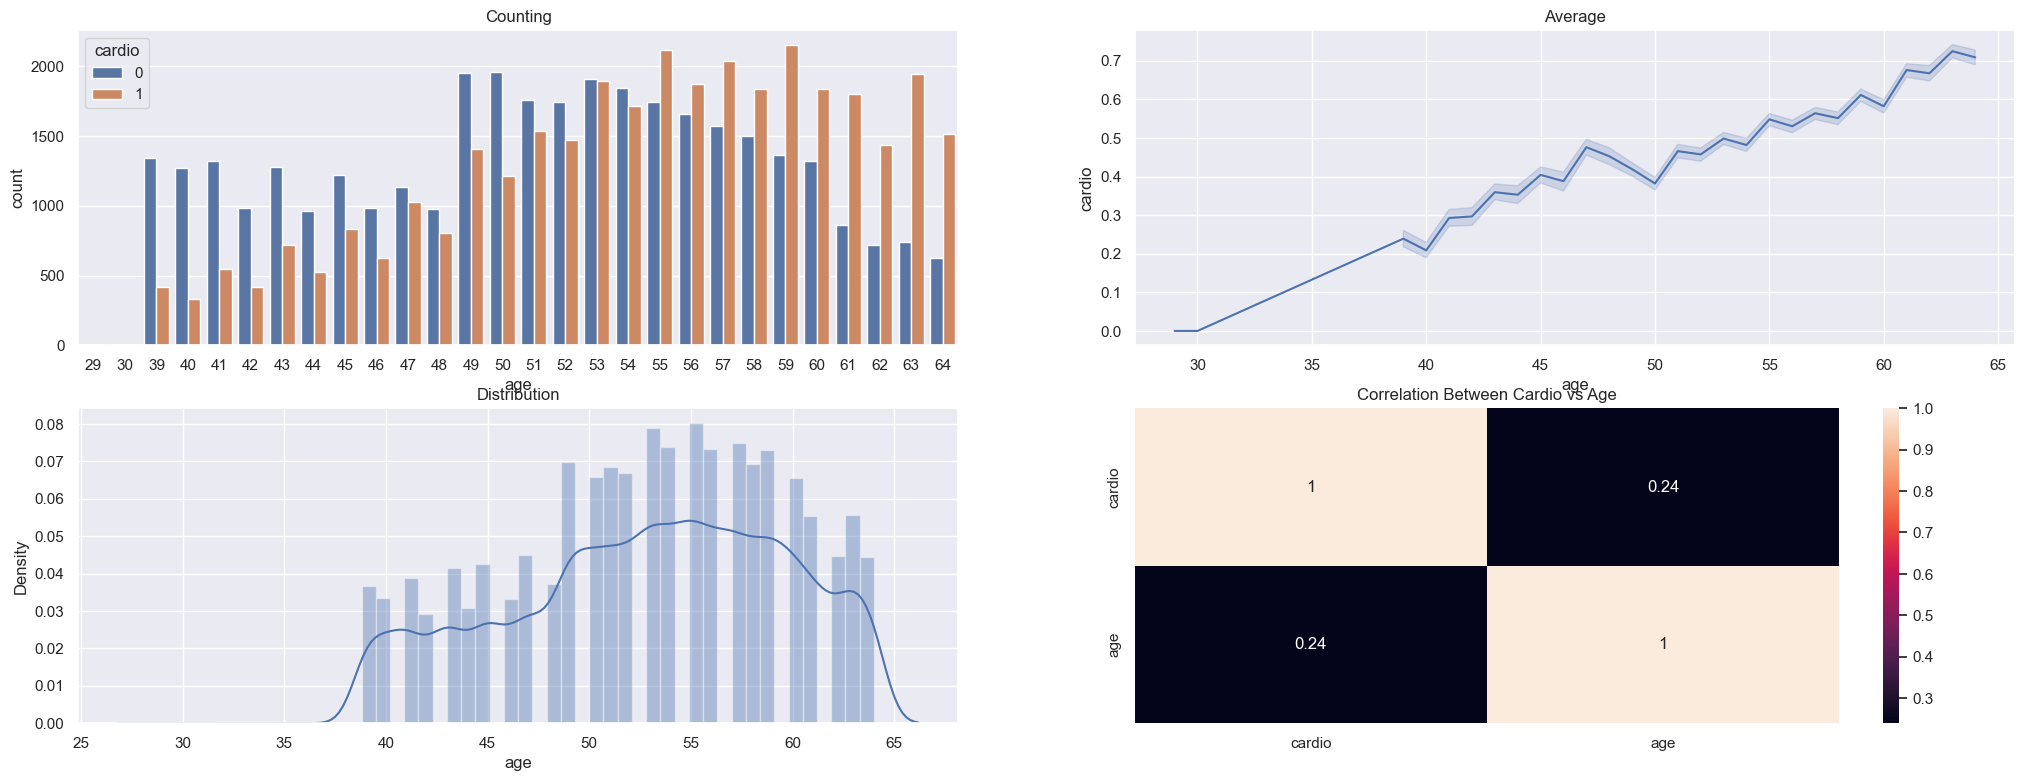

In [39]:
subplot(2,2,1)
plt.title('Counting')
sns.countplot(x='age', hue='cardio', data=df2);

subplot(2,2,2)
plt.title('Average')
sns.lineplot(data=df2, x='age', y='cardio', estimator='mean');

subplot(2,2,3)
plt.title('Distribution')
sns.distplot(df2['age']);

subplot(2,2,4)
plt.title('Correlation Between Cardio vs Age')
sns.heatmap(df2[['cardio', 'age']].corr('pearson'), annot=True);

##### 5.2.5 - Over 60 year old with Hypertension, more risk
   False

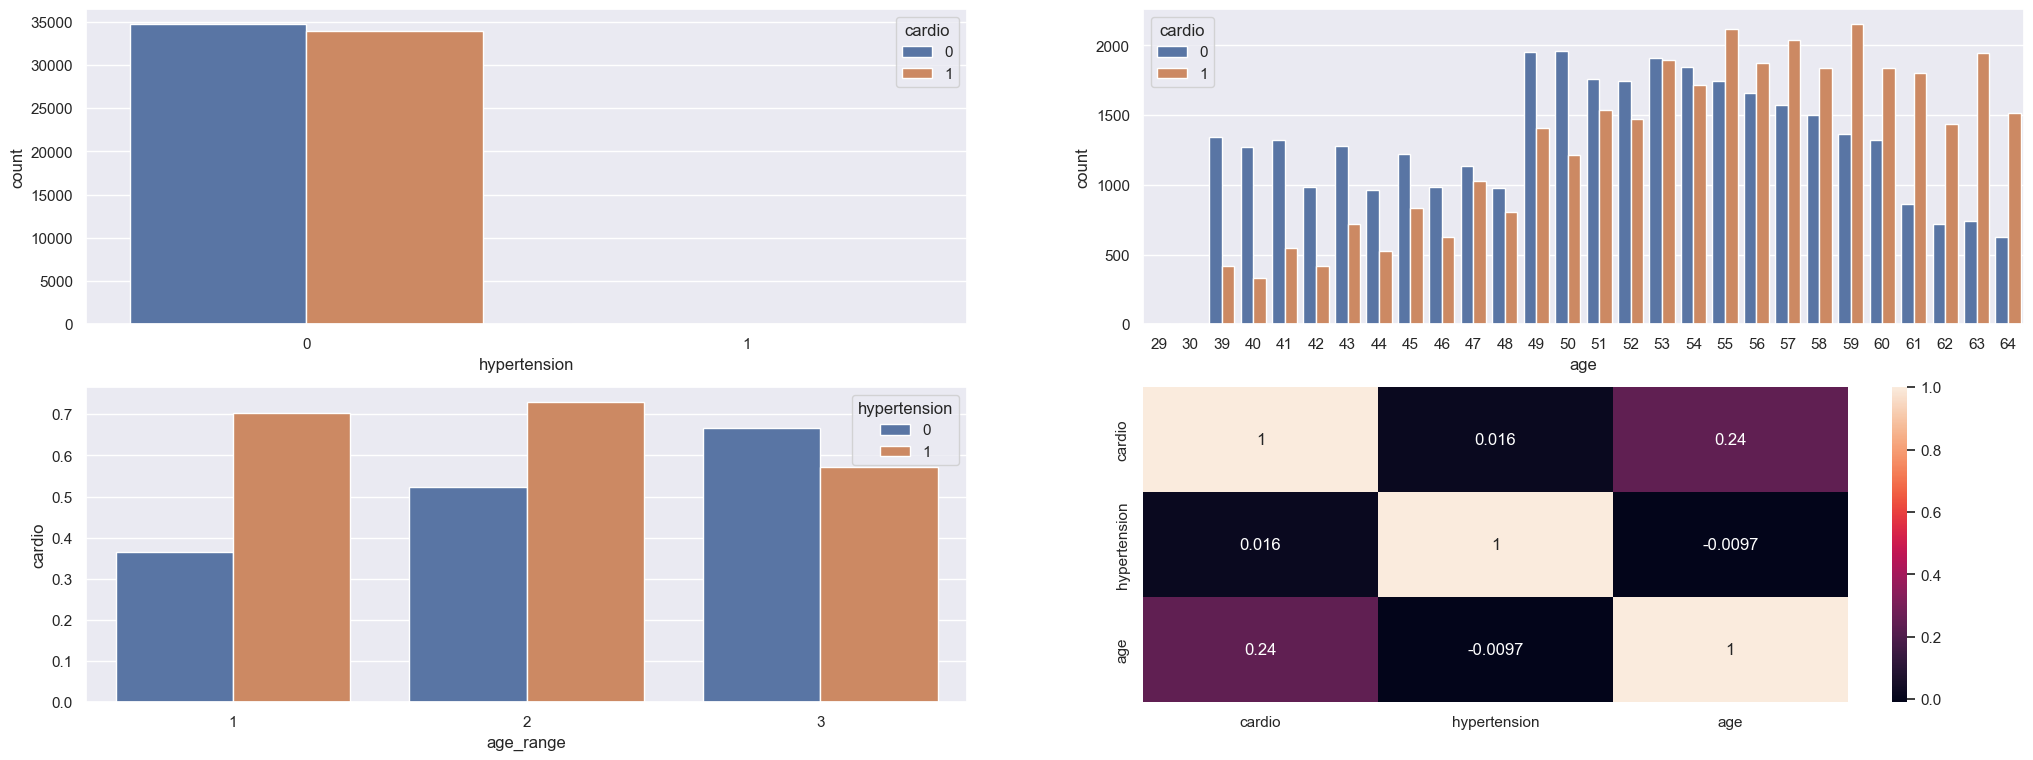

In [40]:
aux = df2[['age_range', 'cardio']].groupby('age_range').mean().reset_index()
aux1 = df2[['cardio', 'age_range', 'hypertension']]

plt.subplot(2,2,1)
sns.countplot(hue='cardio', x='hypertension', data=aux1);

plt.subplot(2,2,2)
sns.countplot(x='age', hue='cardio', data=df2);

# Average incidence of diseases by hypertension and over 60 year.
subplot(2,2,3)
aux = df2[['hypertension', 'cardio', 'age_range']].groupby(['hypertension', 'age_range']).mean().reset_index()
sns.barplot(x='age_range', y='cardio', hue='hypertension', data=aux);

subplot(2,2,4)
sns.heatmap(df2[['cardio', 'hypertension', 'age']].corr('pearson'), annot=True);

##### 5.2.6 - 60 year old with Hypotension, more risk
   False

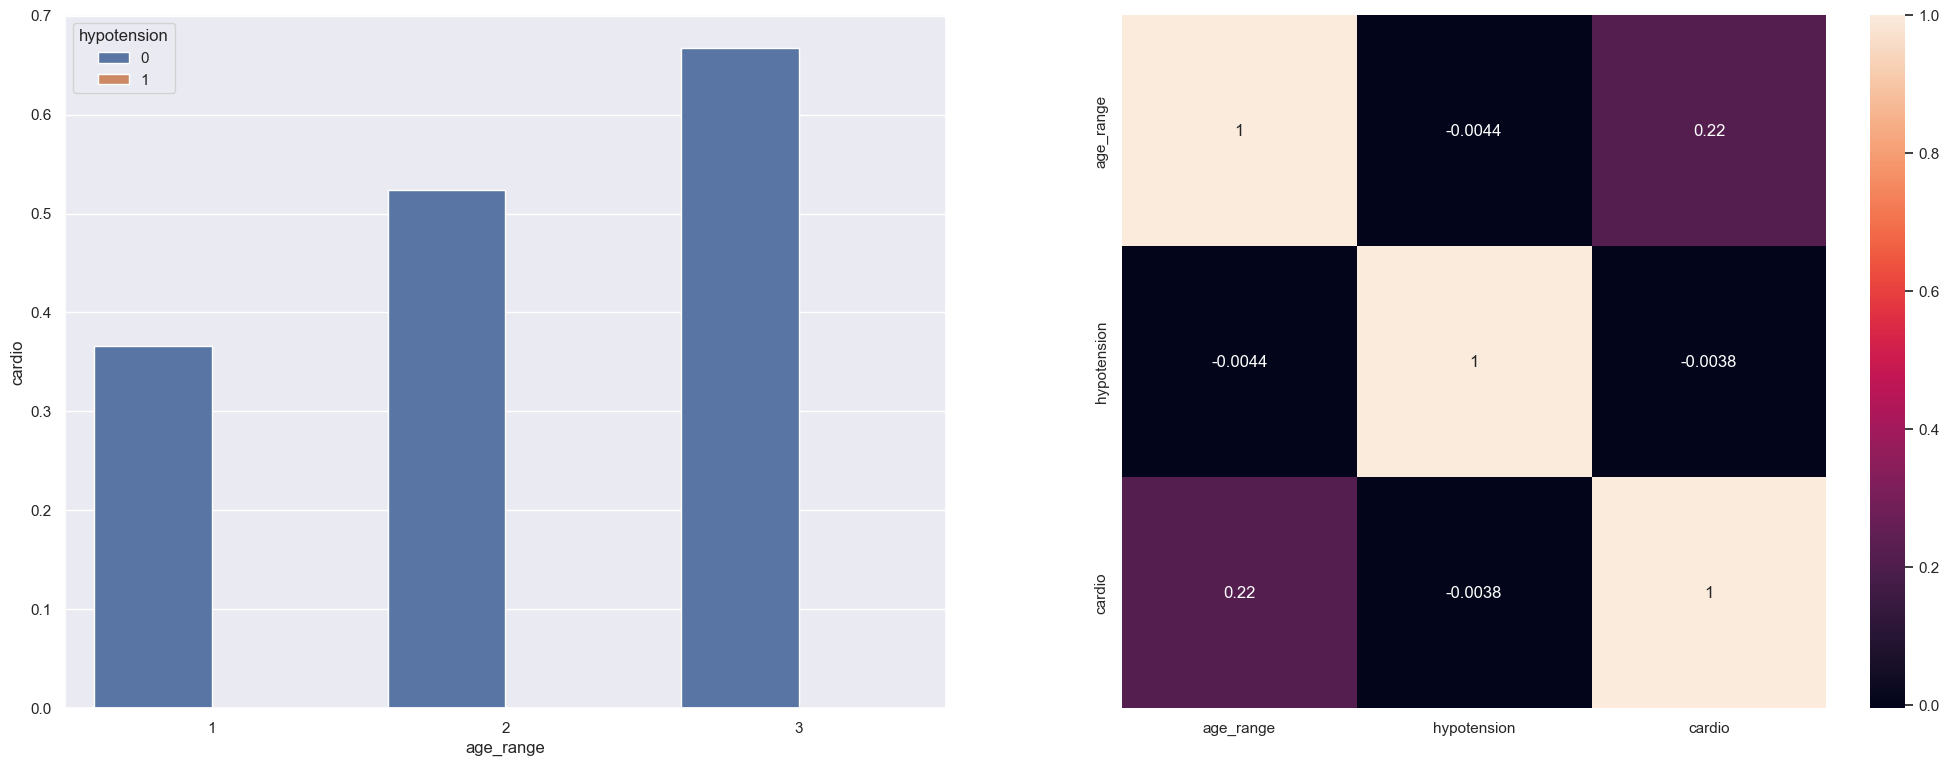

In [41]:
aux = df2[['hypotension', 'age_range', 'cardio']].groupby(
    ['hypotension', 'age_range']).mean().reset_index()

plt.subplot(1,2,1)
sns.barplot(x='age_range', y='cardio', hue='hypotension', data=aux);


plt.subplot(1,2,2)
sns.heatmap(df2[['age_range', 'hypotension', 'cardio']].corr('pearson'), annot=True);

##### 5.2.7 - 60 year old, more risk
   False

In [42]:
df2[['cardio','age_range']].groupby('cardio').value_counts(normalize=True ).reset_index()

,cardio,age_range,0
0,0,1,0.442839
1,0,2,0.434579
2,0,3,0.122582
3,1,2,0.488643
4,1,1,0.260615
5,1,3,0.250742


##### 5.2.8 - Divergent AP, more risk
   True - Relevant variable

<AxesSubplot:>

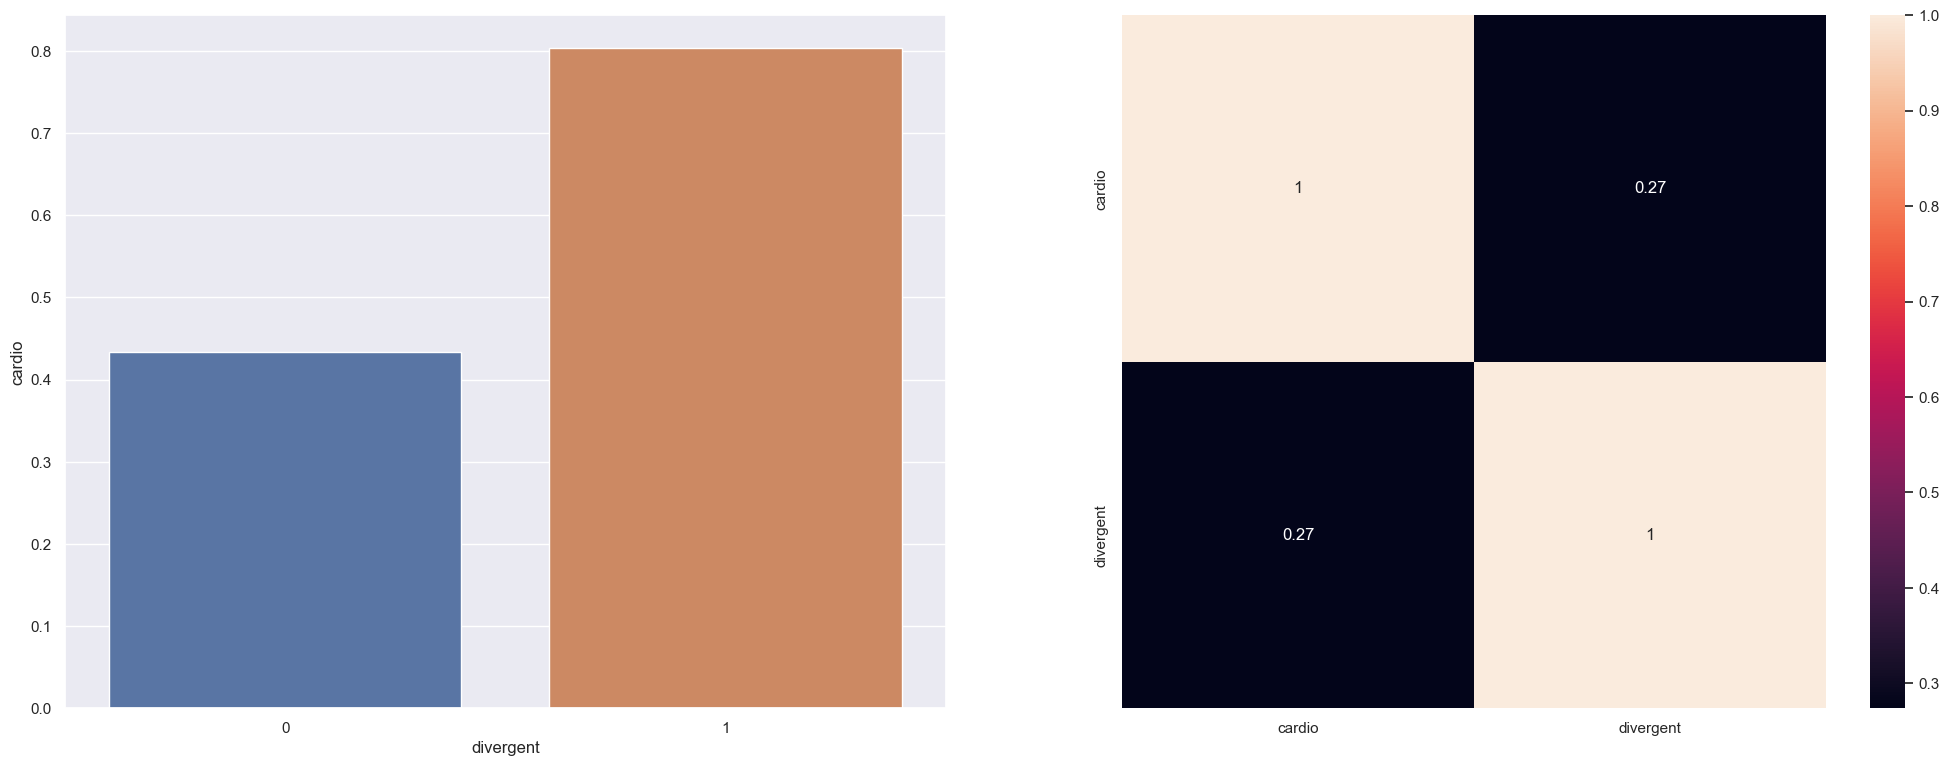

In [43]:
aux = df2[['divergent', 'cardio']].groupby('divergent').mean().reset_index()

plt.subplot(1,2,1)
sns.barplot(x='divergent', y='cardio', data=aux)

plt.subplot(1,2,2)
sns.heatmap(df2[['cardio', 'divergent']].corr('pearson'), annot=True)

##### 5.2.9 - Convergent AP, more risk
   False

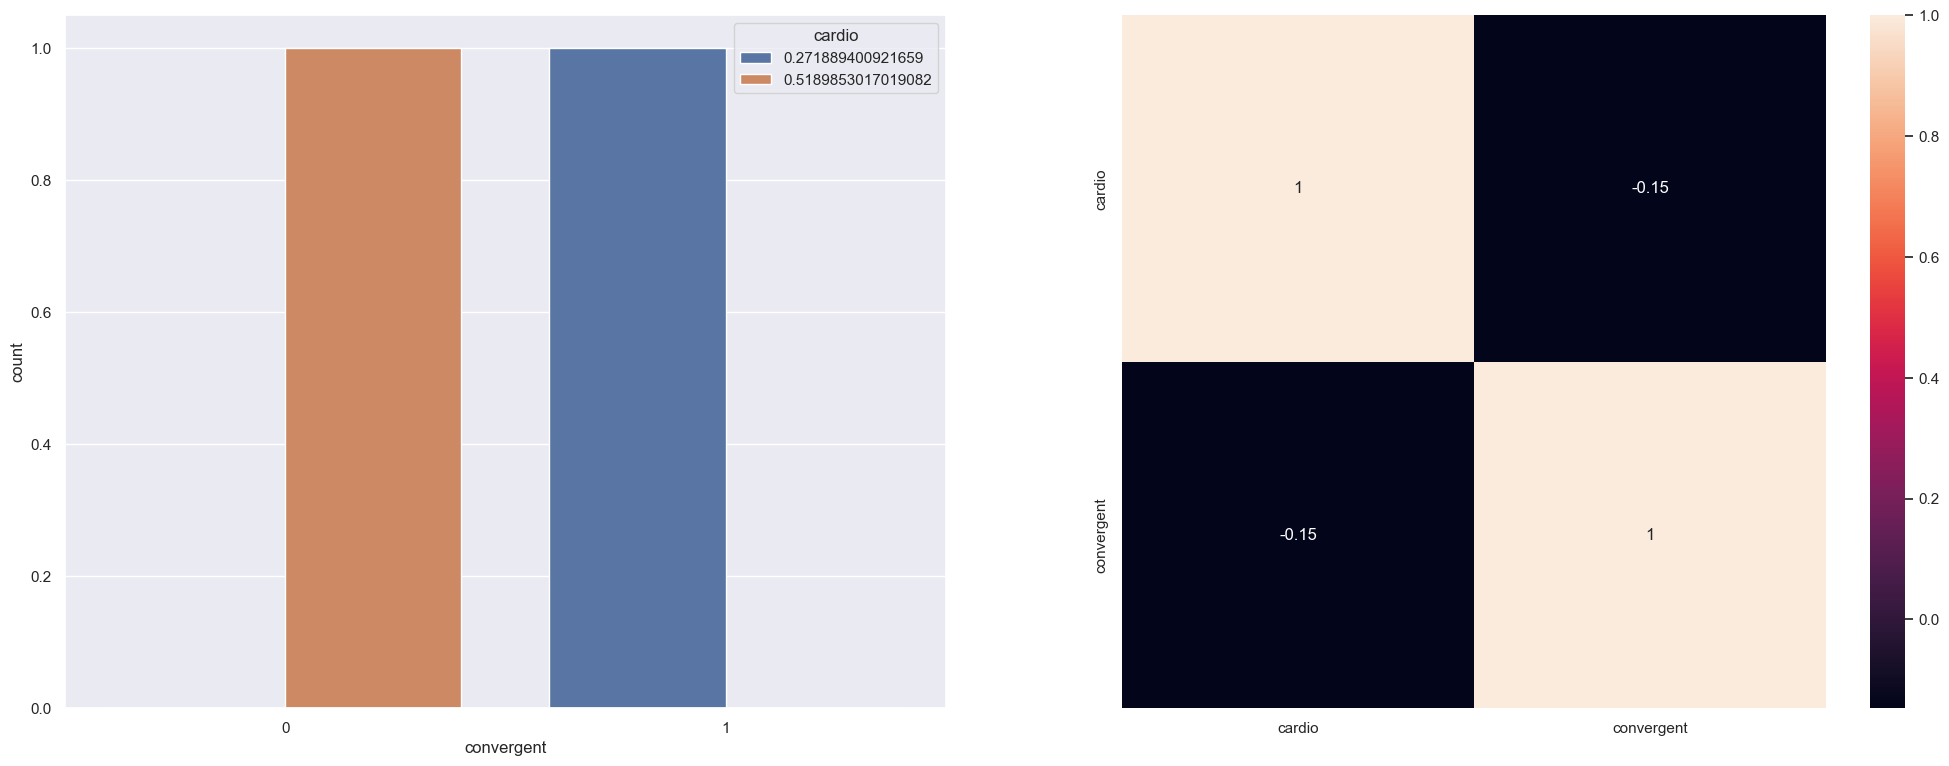

In [44]:
plt.subplot(1,2,1)
sns.countplot(x='convergent', hue='cardio',
    data=df2[['cardio', 'convergent']].groupby('convergent').mean().reset_index());

plt.subplot(1,2,2)
sns.heatmap(df2[['cardio', 'convergent']].corr('pearson'), annot=True);

##### 5.2.10 - Hypertension, more risk
   True

Average incidence by Hypertension

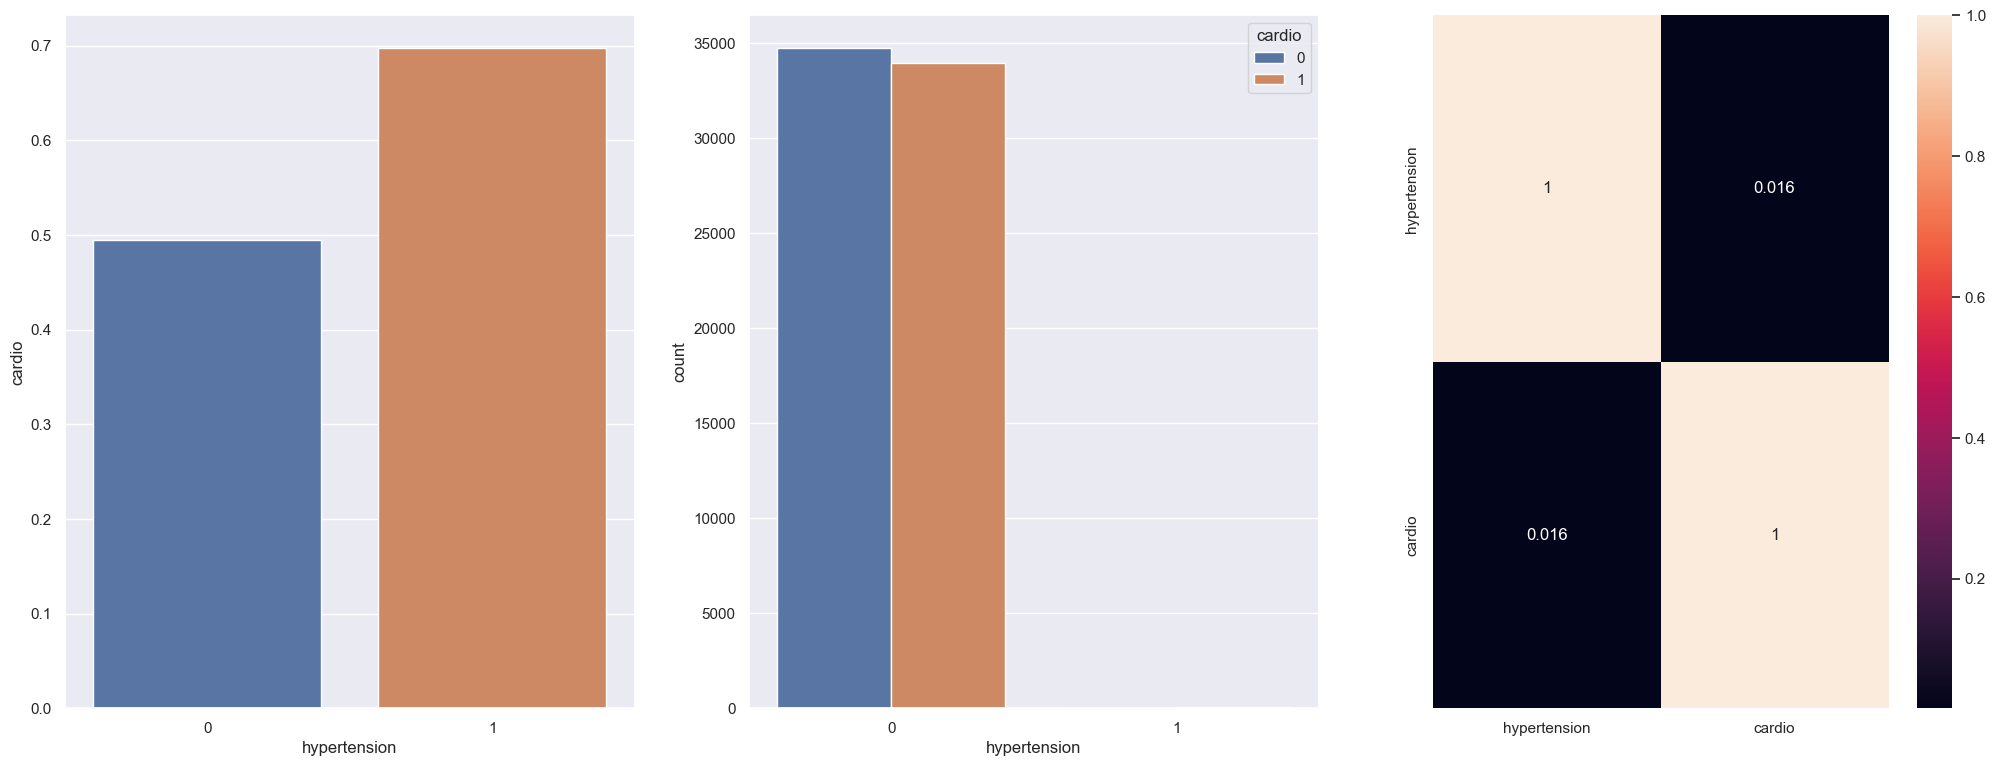

In [45]:
aux = df2[['hypertension', 'cardio']].groupby('hypertension').mean().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='hypertension', y='cardio', data=aux);

plt.subplot(1,3,2)
sns.countplot(x='hypertension', hue='cardio', data=df2);

plt.subplot(1,3,3)
sns.heatmap(df2[['hypertension', 'cardio']].corr('pearson'), annot=True);

In [46]:
# Hypertension percentual
df2['hypertension'].value_counts()


0    68666
1      109
Name: hypertension, dtype: int64

##### 5.2.11 - Hypotension, more risk
   False

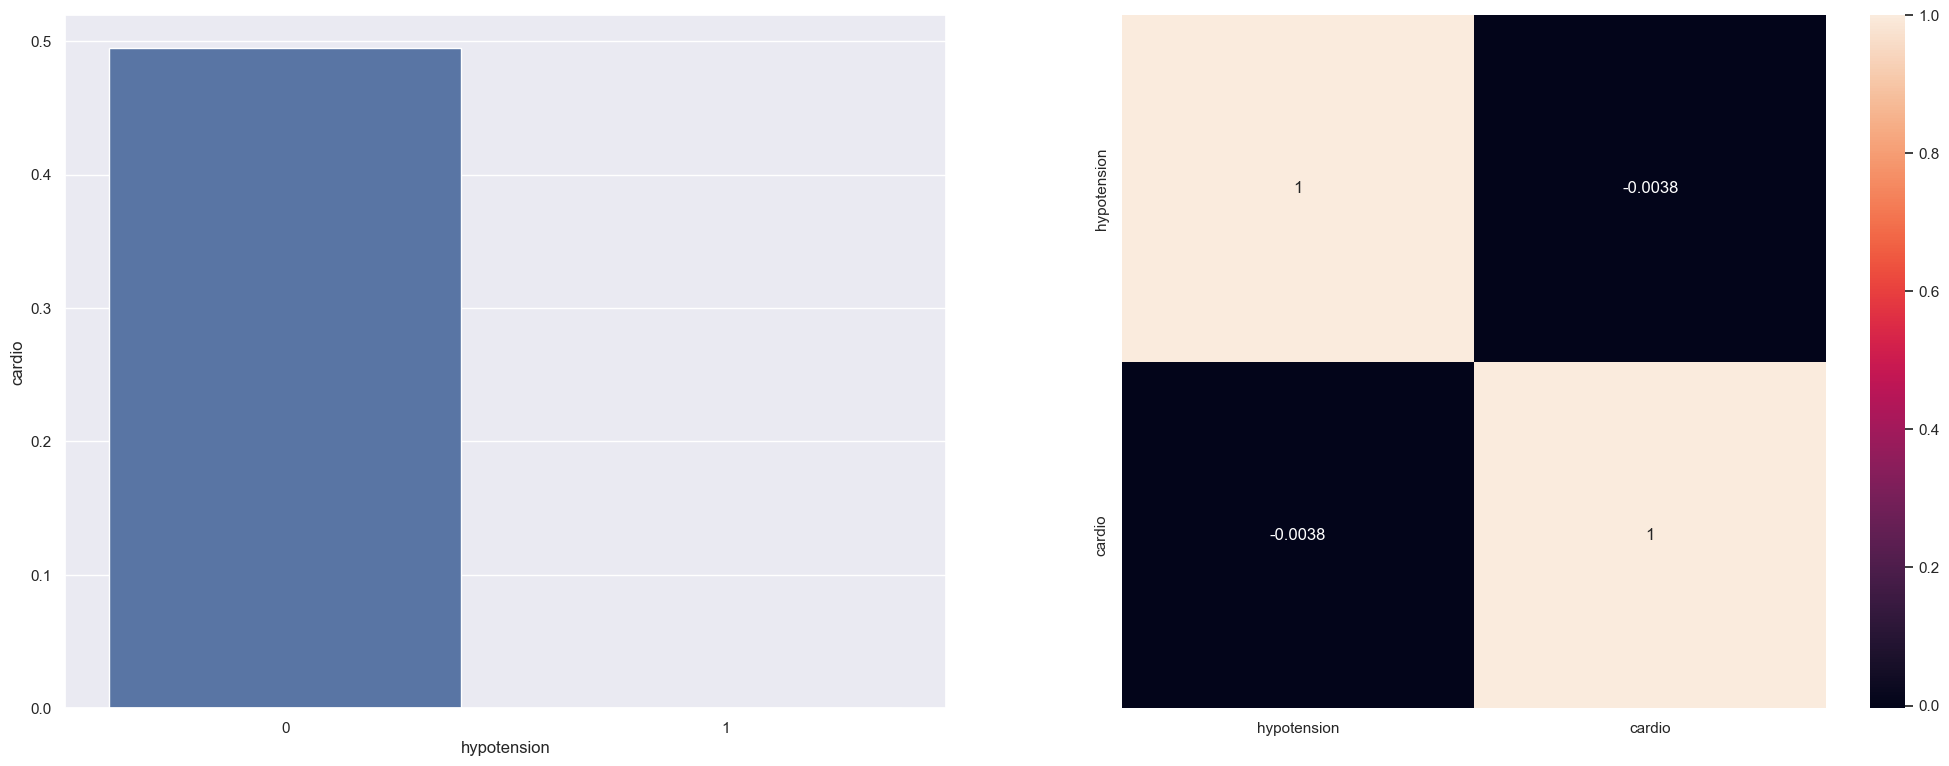

In [47]:
aux = df2[['hypotension', 'cardio']].groupby('hypotension').mean().reset_index()

plt.subplot(1,2,1)
sns.barplot(x='hypotension', y='cardio', data=aux);

plt.subplot(1,2,2)
sns.heatmap(df2[['hypotension', 'cardio']].corr('pearson'), annot=True);

In [48]:
df2['hypotension'].value_counts()

0    68774
1        1
Name: hypotension, dtype: int64

##### 5.2.12 - BMI - Obesity, more risk
   True

   bmi_level  cardio         0
0          0       0  0.724728
1          0       1  0.275272
2          1       0  0.604461
3          1       1  0.395539
4          2       1  0.505478
5          2       0  0.494522
6          3       1  0.614713
7          3       0  0.385287
   bmi_level    cardio
0          0  0.275272
1          1  0.395539
2          2  0.505478
3          3  0.614713


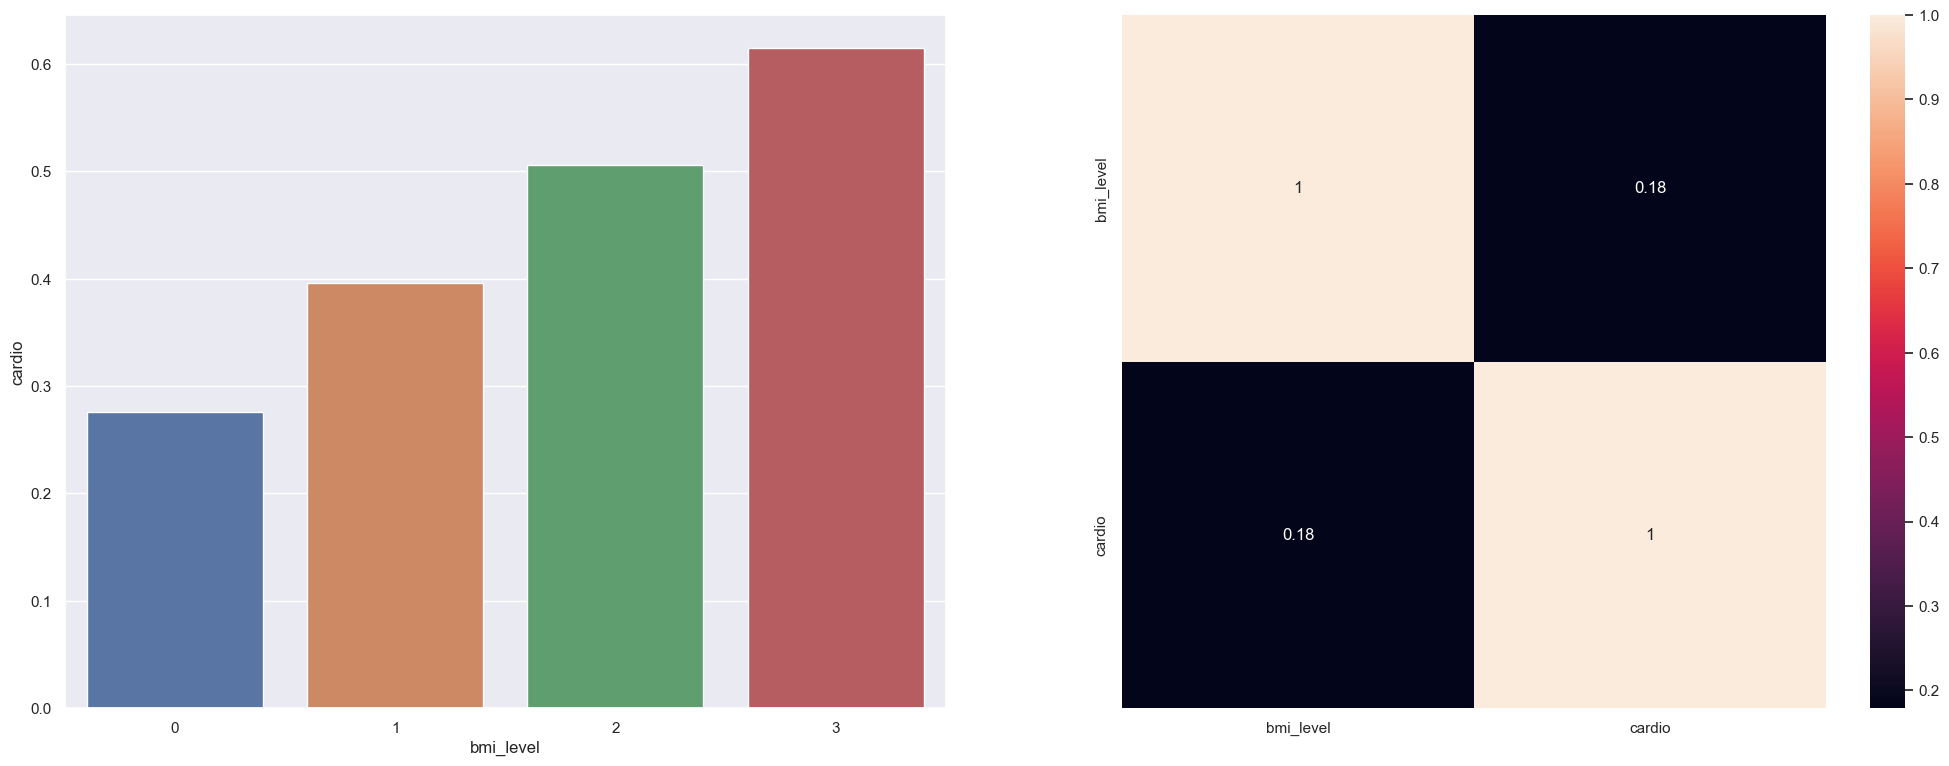

In [49]:
aux = df2[['bmi_level', 'cardio']].groupby('bmi_level').value_counts(normalize=True).reset_index()
print(aux)
aux = df2[['bmi_level', 'cardio']].groupby('bmi_level').mean().reset_index()
print(aux)

plt.subplot(1,2,1)
sns.barplot(x='bmi_level', y='cardio' ,data=aux);

plt.subplot(1,2,2)
sns.heatmap(df2[['bmi_level', 'cardio']].corr('pearson'), annot=True);

# aux1 = df2[(df2['cardio'] ==1)]
# aux2 = df2[(df2['cardio'] ==2) ]


##### 5.2.13 - Gender 2 has more risk
   False

In [50]:
aux = df2[['gender', 'cardio']].groupby('gender').value_counts(normalize=True).reset_index()
print(aux)
aux = df2[['gender', 'cardio']].groupby('gender').mean().reset_index()
print(aux)

   gender  cardio         0
0       1       0  0.507848
1       1       1  0.492152
2       2       0  0.500208
3       2       1  0.499792
   gender    cardio
0       1  0.492152
1       2  0.499792


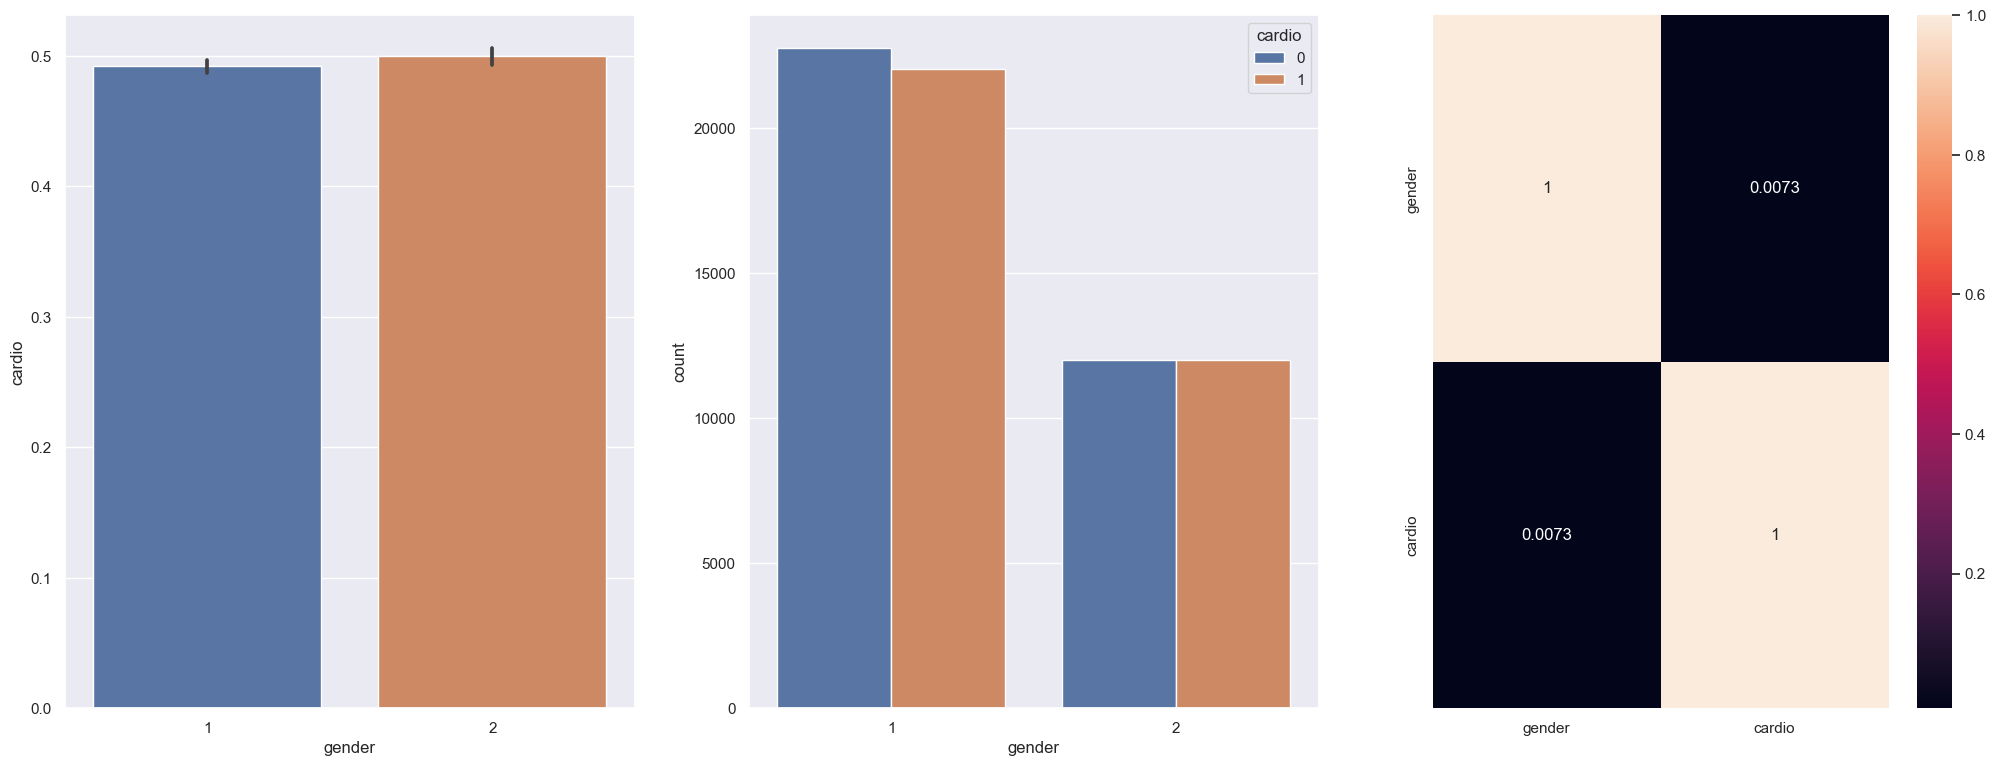

In [51]:
plt.subplot(1,3,1)
sns.barplot(x='gender', y='cardio', data=df2)
plt.subplot(1,3,2)
sns.countplot(x='gender', hue='cardio', data=df2 );
plt.subplot(1,3,3)
sns.heatmap(df2[['gender', 'cardio']].corr('pearson'), annot=True);


##### 5.2.14 - how more weith more risk
   True

In [52]:
aux = df2[['weight_range', 'cardio']].groupby('weight_range').value_counts(normalize=True).reset_index()
print(aux)
aux = df2[['weight_range', 'cardio']].groupby('weight_range').mean().reset_index()
print(aux)

    weight_range  cardio         0
0           0.50       0  0.717199
1           0.50       1  0.282801
2           0.75       0  0.560907
3           0.75       1  0.439093
4           1.00       1  0.577478
5           1.00       0  0.422522
6           1.25       1  0.680783
7           1.25       0  0.319217
8           1.50       1  0.745387
9           1.50       0  0.254613
10          1.75       1  0.577778
11          1.75       0  0.422222
12          2.00       1  0.625000
13          2.00       0  0.375000
   weight_range    cardio
0          0.50  0.282801
1          0.75  0.439093
2          1.00  0.577478
3          1.25  0.680783
4          1.50  0.745387
5          1.75  0.577778
6          2.00  0.625000


In [53]:
df2.isna().sum()

id                0
age               0
gender            0
height            0
weight            0
hight_pressure    0
low_pressure      0
cholesterol       0
glucose           0
smoker            0
alcohol           0
active            0
cardio            0
bmi               0
bmi_level         0
hypertension      0
hypotension       0
difference        0
convergent        0
divergent         0
age_range         0
weight_range      0
dtype: int64

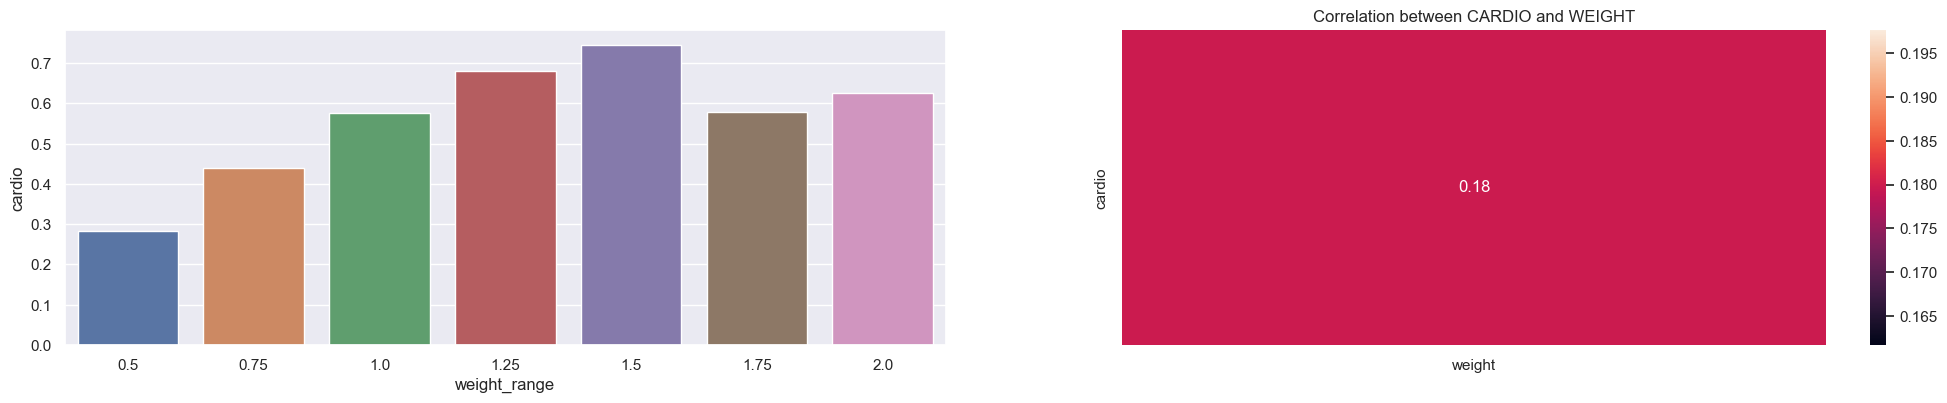

In [54]:
aux = df2[['weight_range', 'cardio']].groupby('weight_range').mean().reset_index()
grid = GridSpec(2,2)

plt.subplot(grid[1,0])
sns.barplot(x='weight_range', y='cardio', data=aux);
                 
plt.subplot(grid[1,1])
plt.title('Correlation between CARDIO and WEIGHT')
pointb = pointbiserialr(df2['weight'], df2['cardio']).correlation
sns.heatmap(pd.DataFrame({'weight':pointb}, index=['cardio']), annot=True);

### 5.3 - Multivariate Analysis

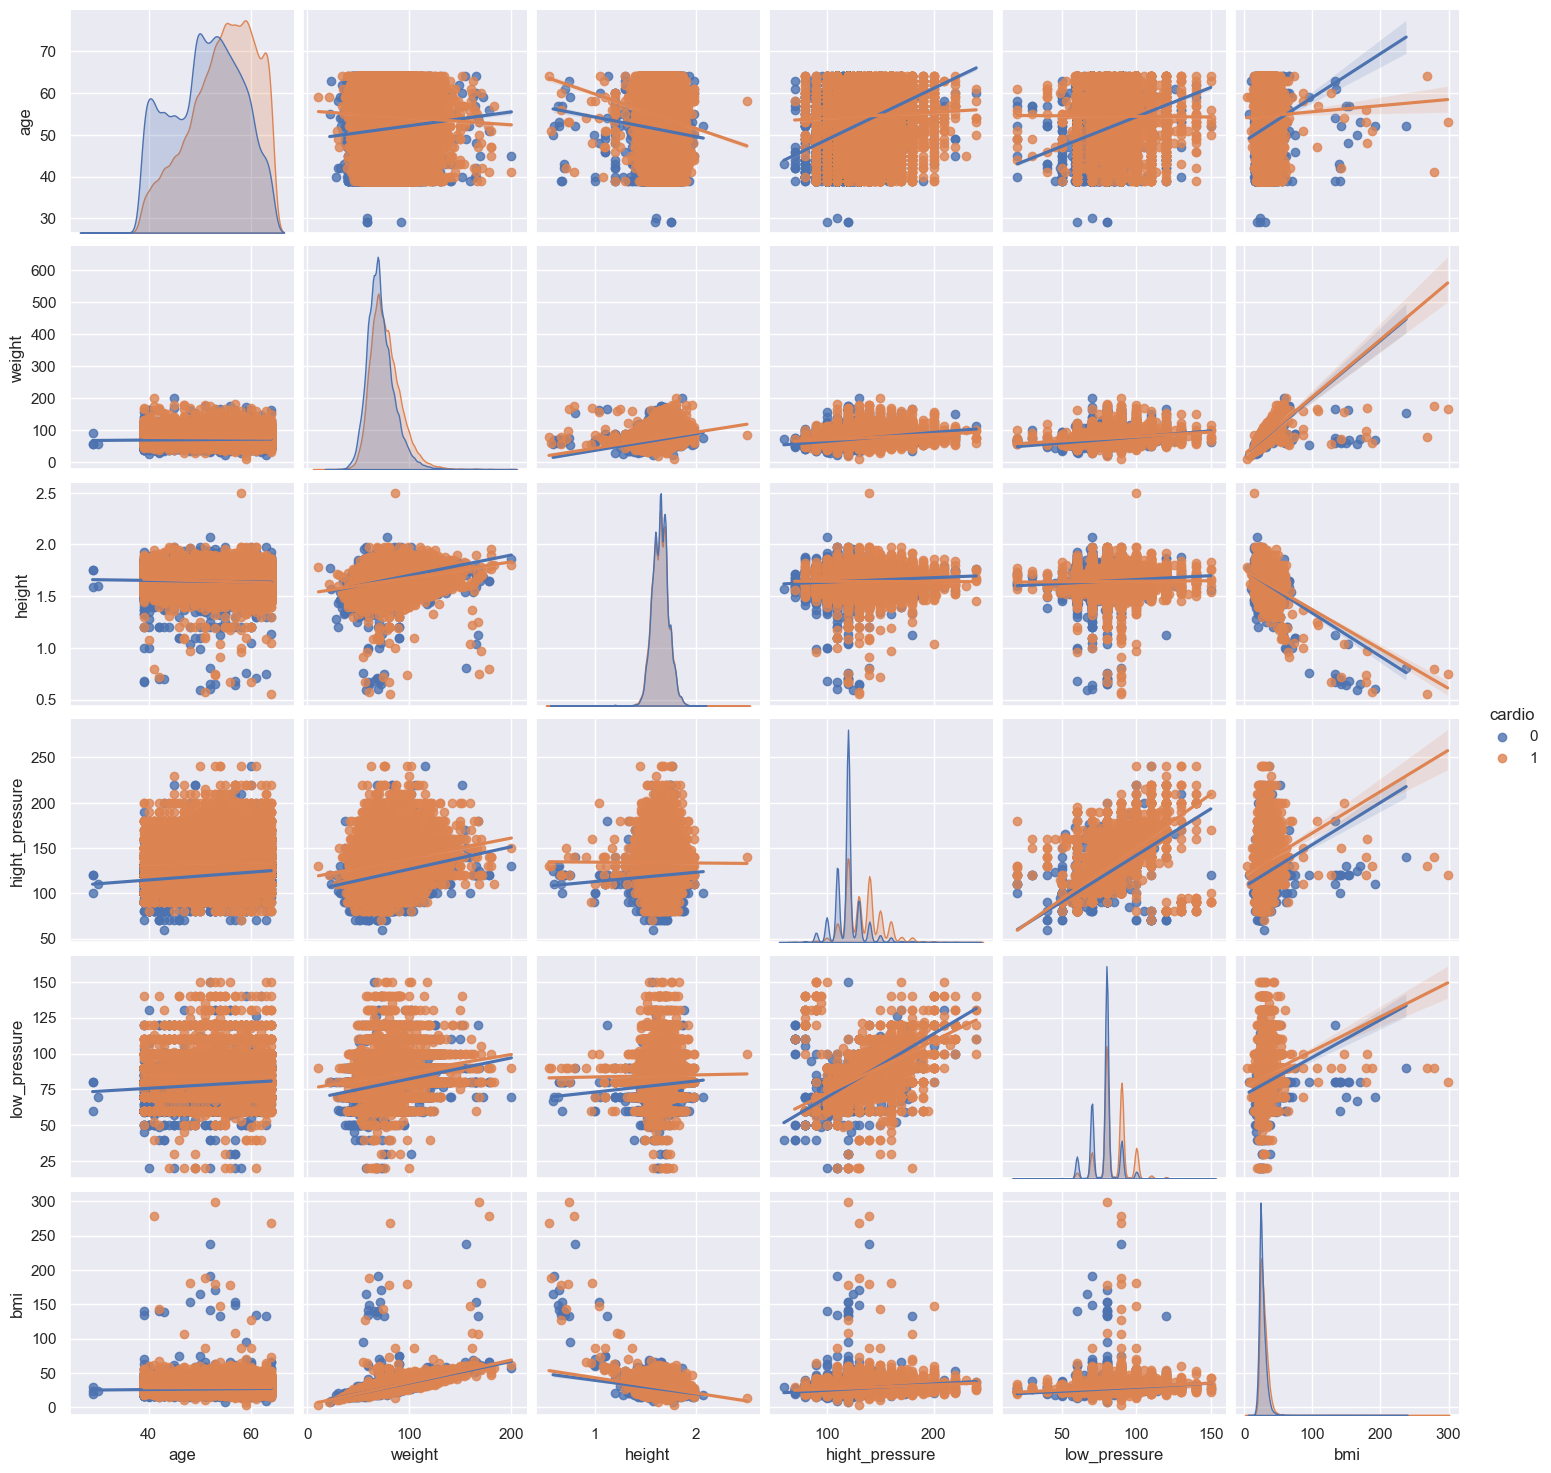

In [55]:
#pair grid
#fig, ax=plt.subplots(figsize=(6,6))
vars=['age','weight','height','hight_pressure','low_pressure','bmi']
p=pairplot(df2,vars=vars,hue='cardio',kind='reg');

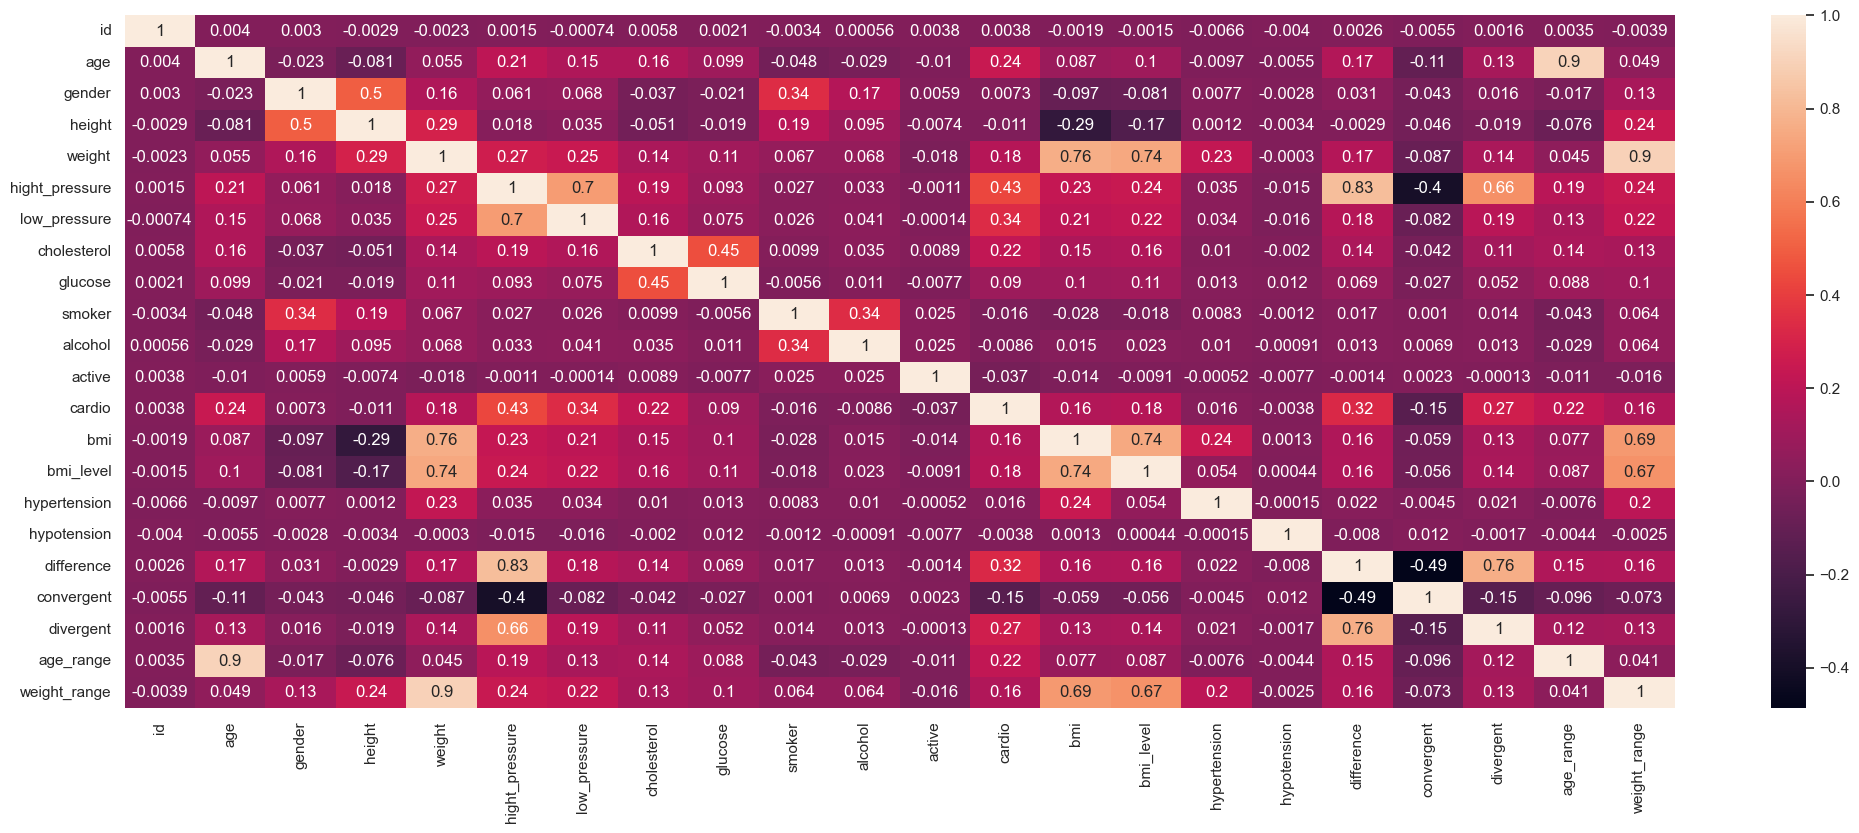

In [56]:
sns.heatmap(df2.corr(), annot=True);

## 6.0 - Data Preparation

In [57]:
df3=df2.copy()


### 6.1 - Normalization



In [58]:
# age
ss=StandardScaler()
df3['age'] = ss.fit_transform(df3[['age']].values)
pickle.dump(ss, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\age_scaling.pkl', 'wb'))

### 6.2 - Rescaling Robust Scaler

In [59]:
rs = RobustScaler() #outiliers

# height         
df3['height'] = rs.fit_transform(df3[['height']].values)
pickle.dump(rs, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\height_scaling.pkl', 'wb'))

# weight
df3['weight'] = rs.fit_transform(df3[['weight']].values)
pickle.dump(rs, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\weight_scaling.pkl', 'wb'))

# difference     
df3['difference'] = rs.fit_transform(df3[['difference']].values)
pickle.dump(rs, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\difference_scaling.pkl', 'wb'))

# bmi            
df3['bmi'] = rs.fit_transform(df3[['bmi']].values)
pickle.dump(rs, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\bmi_scaling.pkl', 'wb'))


### 6.3 - Rescaling MinMaxScaler

In [60]:
mms = MinMaxScaler()
# low_pressure   
df3['low_pressure'] = mms.fit_transform(df3[['low_pressure']].values)
pickle.dump(mms, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\low_pressure_scaling.pkl', 'wb'))

#hight_pressure
df3['hight_pressure'] = mms.fit_transform(df3[['hight_pressure']].values)
pickle.dump(mms, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\hight_pressure_scaling.pkl', 'wb'))


### 6.4 - Encoding

In [61]:
# Nominal variables

# #df3=pd.get_dummies(df3,prefix=['gender'],columns=['gender'])

# One hot encoder
ohe = OneHotEncoder()
X=ohe.fit_transform(df3.gender.values.reshape(-1,1)).toarray()
X=pd.DataFrame(X,columns=[0,1]).rename(columns = {0:'gender_1',1:'gender_2'})
df3=pd.concat([df3,X],axis=1,join="inner")
df3=df3.drop(['gender'],axis=1)
pickle.dump(df3, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\parameters\gender_scaling.pkl', 'wb'))


## 7.0 - Feature Selection

### 7.1 Spliting after rescaling

In [62]:
X = df3.drop(['cardio','id'], axis=1).copy()
y = df3['cardio'].copy()
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

### 7.1 - PCA

In [63]:
X.shape

(67574, 21)

In [64]:
pca= PCA(random_state=42)
X_pca=pca.fit_transform(StandardScaler().fit_transform(X))
pca.explained_variance_ratio_
pca.components_[0]

array([ 0.15487045,  0.00799486,  0.38528542,  0.36053028,  0.25054386,
        0.15880911,  0.10983228,  0.01823325,  0.03071859, -0.00732853,
        0.35780484,  0.35333595,  0.09724571, -0.0049413 ,  0.29959559,
       -0.15743014,  0.25513727,  0.14527446,  0.36453586, -0.00892191,
        0.00892191])

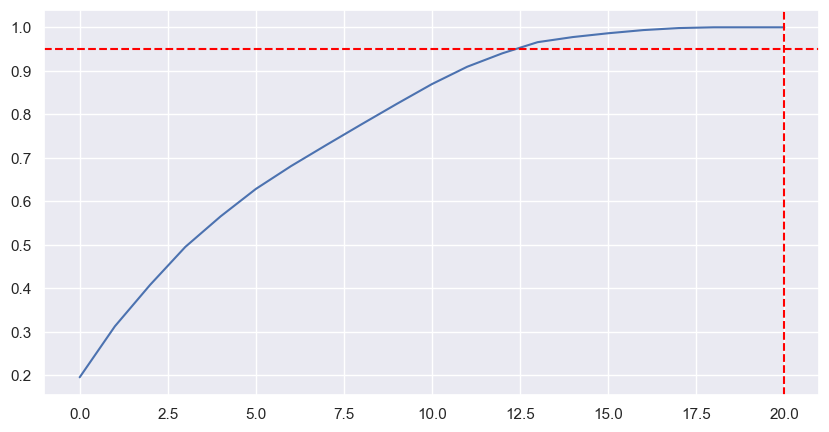

In [65]:
plt.figure(figsize=(10,5) )
plt.plot( np.cumsum( pca.explained_variance_ratio_ ) )
plt.axvline( 20, color='red', linestyle='--')
plt.axhline( 0.95, color='red', linestyle='--');

In [66]:
# change data to new space
k = np.argmax( np.cumsum( pca.explained_variance_ratio_ ) > 0.95 )
k

13

### 7.2 - RFE

In [67]:
# Create linear regression object
mdl = ExtraTreesClassifier(n_estimators=100)

# Create RFE object 
rfe = RFE(mdl, n_features_to_select=k)

# Fit RFE
rfe.fit(X, y)

# Print selected features
select_features_rfe=list(X.columns[rfe.support_])
select_features_rfe

['age',
 'height',
 'weight',
 'hight_pressure',
 'low_pressure',
 'cholesterol',
 'glucose',
 'bmi',
 'bmi_level',
 'difference',
 'divergent',
 'age_range',
 'gender_2']

### 7.3 - Decision Tree

In [68]:
# Create ExtraTreesClassifier object
clf = ExtraTreesClassifier(n_estimators=100)

# Fit ExtraTreesClassifier
clf.fit(X, y)

# Print feature importances
print("Feature importances: {}".format(clf.feature_importances_))

# Select top 2 features
top_indices = clf.feature_importances_.argsort()[::-1][:9]
top_features = X.columns[top_indices]
#print("Selected features: {}".format(top_features))
select_features_dt=list(top_features)
select_features_dt

Feature importances: [1.19714793e-01 1.38844262e-01 1.32968951e-01 8.90381015e-02
 7.38965807e-02 4.43776145e-02 1.93493602e-02 1.03397037e-02
 7.86428737e-03 1.42693314e-02 1.53006649e-01 2.33876996e-02
 3.49357419e-04 2.61873825e-06 4.46371357e-02 1.09478965e-02
 5.11042580e-02 3.03649913e-02 1.85722833e-02 8.49096164e-03
 8.47316377e-03]


['bmi',
 'height',
 'weight',
 'age',
 'hight_pressure',
 'low_pressure',
 'divergent',
 'difference',
 'cholesterol']

### 7.4 - Boruta

In [69]:
#!pip install boruta
from boruta import BorutaPy

x_boruta = x_train.values
y_boruta = y_train.ravel()
clf = ExtraTreesClassifier(n_estimators=100)

# Defining Boruta
boruta = BorutaPy(clf, n_estimators='auto', verbose=0, random_state=42).fit(x_boruta, y_boruta)

cols_selected = boruta.support_.tolist()
cols_selected_boruta = x_train.iloc[:, cols_selected].columns.to_list()
cols_selected_boruta

['age', 'weight', 'hight_pressure', 'low_pressure', 'bmi', 'divergent']

### 7.5 Features selected

In [70]:
x_train = x_train[select_features_rfe].copy()
x_valid=x_valid[select_features_rfe].copy()

## 8.0 - Modeling

### 8.1 - Baseline

*The* baseline is the "status quo", between **55%** and **65%** of **PRECISION** Score

### 8.2 - Random Forest

In [71]:
mdl = RandomForestClassifier(n_estimators=150, verbose=1,random_state=42).fit(x_train, y_train)
mdl_name = 'RandomForestClassifier'
y_hat = mdl.predict(x_valid)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(mdl, x_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

df3_score_rf = metrics_score(y_valid, y_hat, mdl_name)
df3_score_rf['precision_cv'] = mean(n_scores)
df3_score_rf['precision_cv_std'] = std(n_scores)
df3_score_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


,mdl_name,accuracy,precision,recall,F1_score,precision_cv,precision_cv_std
0,RandomForestClassifier,0.703399,0.701456,0.693808,0.697611,0.70176,0.006129


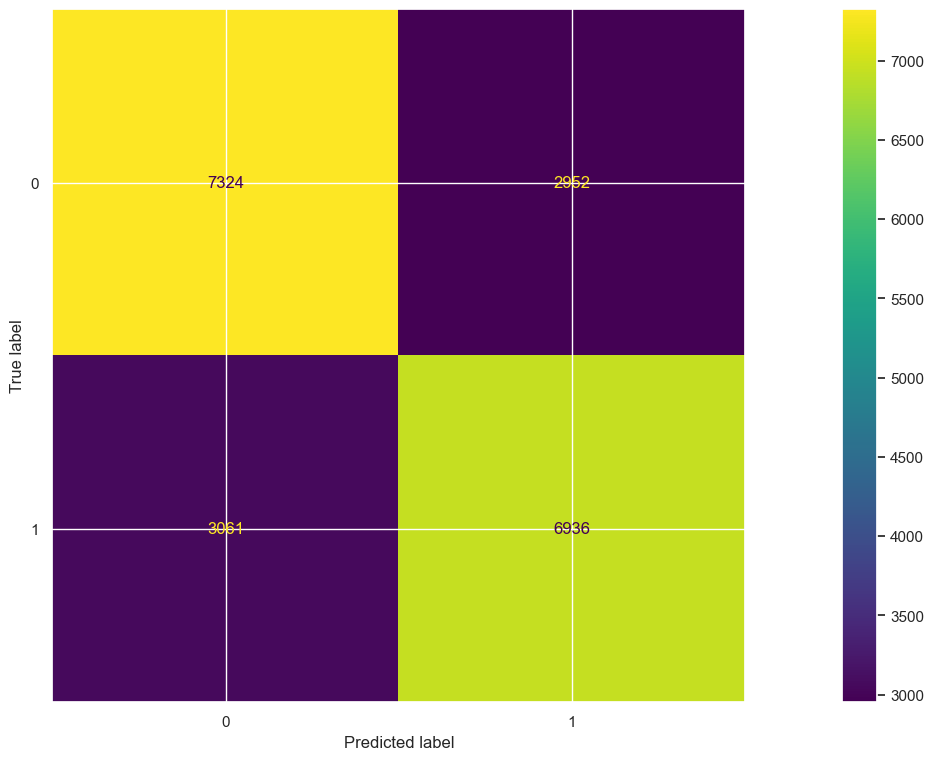

In [72]:
cm = confusion_matrix(y_valid, y_hat)
ConfusionMatrixDisplay(cm).plot();

In [73]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import RocCurveDisplay

# y_score = clf.decision_function(X_test)

# fpr, tpr, _ = roc_curve(y_valid, y_hat)
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### 8.3 - GBDT

In [74]:
mdl = GradientBoostingClassifier().fit(x_train, y_train)
mdl_name ='GradientBoostingClassifier'
y_hat = mdl.predict(x_valid)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(mdl, x_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

df3_score_gbdt = metrics_score(y_valid, y_hat, mdl_name)
df3_score_gbdt['precision_cv'] = mean(n_scores)
df3_score_gbdt['precision_cv_std'] = std(n_scores)
df3_score_gbdt

,mdl_name,accuracy,precision,recall,F1_score,precision_cv,precision_cv_std
0,GradientBoostingClassifier,0.734376,0.74817,0.695409,0.720825,0.748368,0.007358


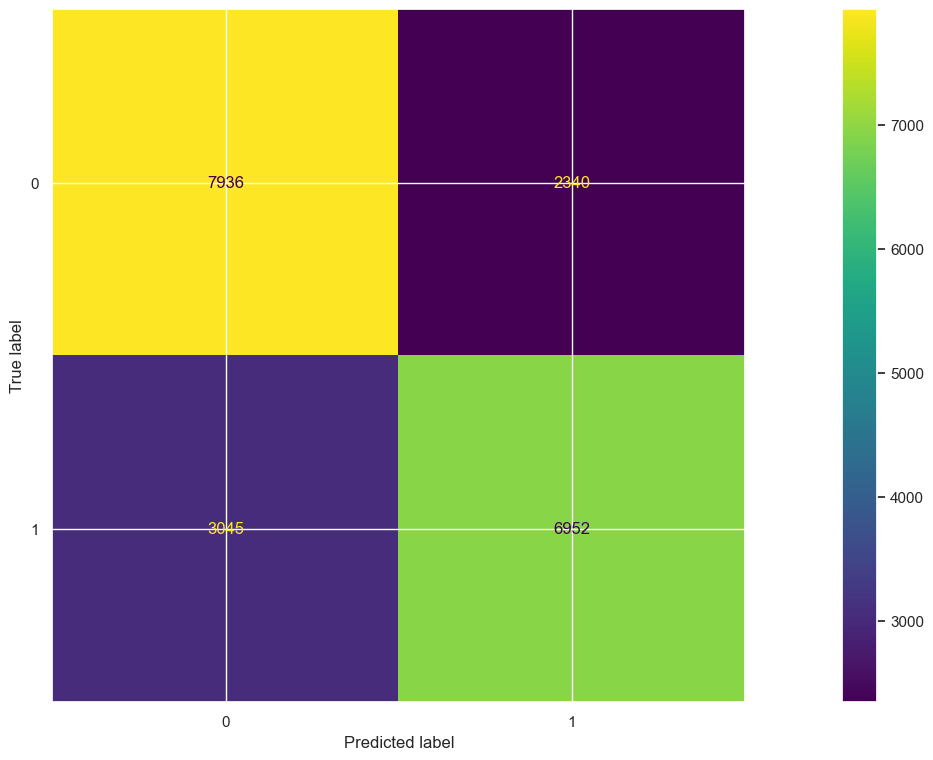

In [75]:
cm = confusion_matrix(y_valid, y_hat)
ConfusionMatrixDisplay(cm).plot();

### 8.4 - Logistic Regression

In [76]:
mdl = LogisticRegression(random_state=42).fit(x_train, y_train)
mdl_name = 'LogisticRegression'
y_hat = mdl.predict(x_valid)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(mdl, x_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

df3_score_lr = metrics_score(y_valid, y_hat, mdl_name)
df3_score_lr['precision_cv'] = mean(n_scores)
df3_score_lr['precision_cv_std'] = std(n_scores)
df3_score_lr

,mdl_name,accuracy,precision,recall,F1_score,precision_cv,precision_cv_std
0,LogisticRegression,0.727075,0.753291,0.663999,0.705832,0.752746,0.00604


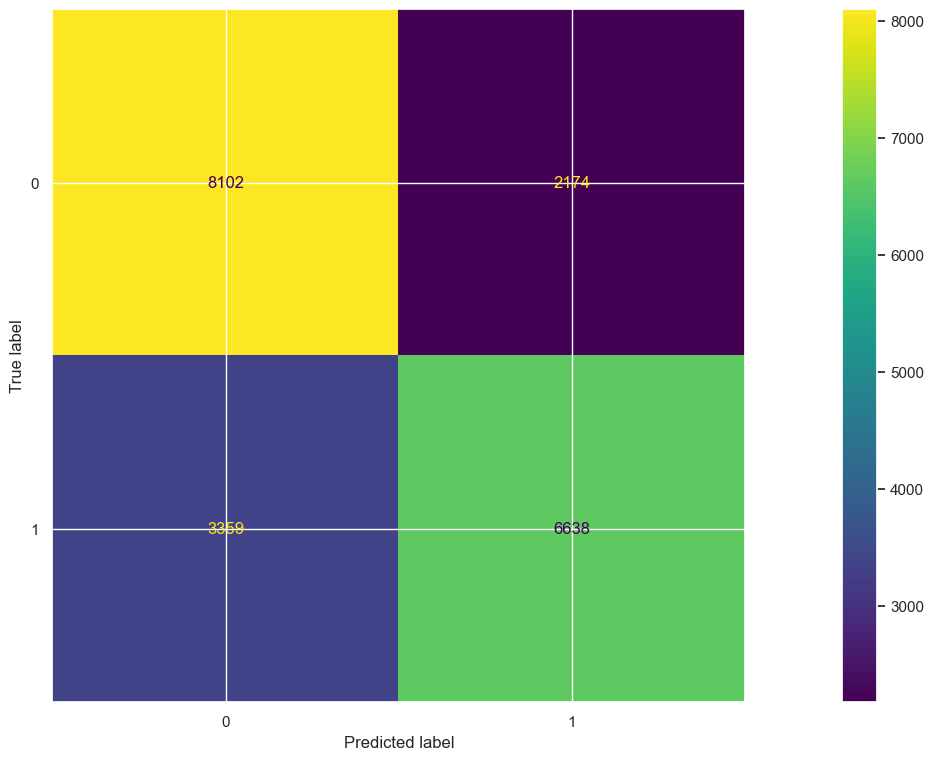

In [77]:
cm = confusion_matrix(y_valid, y_hat)
ConfusionMatrixDisplay(cm).plot();

### 8.5 - XGBClassifier

In [78]:
mdl = XGBClassifier().fit(x_train, y_train)
mdl_name = 'XGBClassifier'

y_hat = mdl.predict(x_valid)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(mdl, x_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

df3_score_xgbc = metrics_score(y_valid, y_hat, mdl_name)
df3_score_xgbc['precision_cv'] = mean(n_scores)
df3_score_xgbc['precision_cv_std'] = std(n_scores)
df3_score_xgbc

,mdl_name,accuracy,precision,recall,F1_score,precision_cv,precision_cv_std
0,XGBClassifier,0.728506,0.745868,0.681705,0.712345,0.745777,0.007314


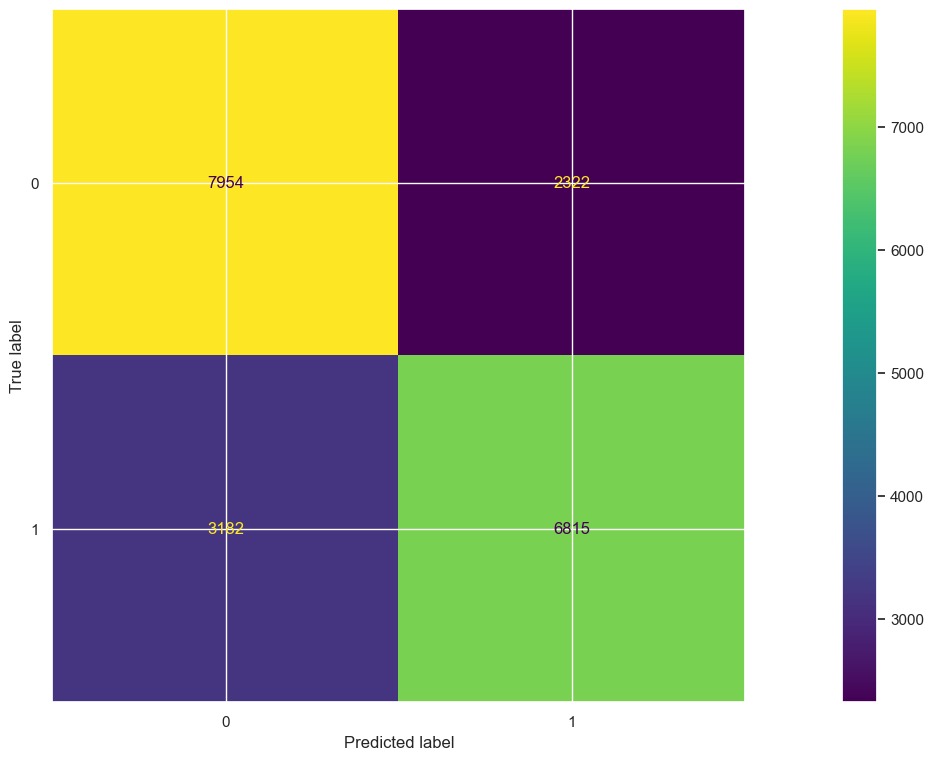

In [79]:
cm = confusion_matrix(y_valid, y_hat)
ConfusionMatrixDisplay(cm).plot();

### 8.6 - KNClassifier

In [80]:
mdl = KNeighborsClassifier().fit(x_train, y_train)
mdl_name = 'KNeighborsClassifier'
yhat = mdl.predict(x_valid)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(mdl, x_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

df3_score_knc = metrics_score(y_valid, y_hat, mdl_name)
df3_score_knc['precision_cv'] = mean(n_scores)
df3_score_knc['precision_cv_std'] = std(n_scores)
df3_score_knc

,mdl_name,accuracy,precision,recall,F1_score,precision_cv,precision_cv_std
0,KNeighborsClassifier,0.728506,0.745868,0.681705,0.712345,0.662284,0.005631


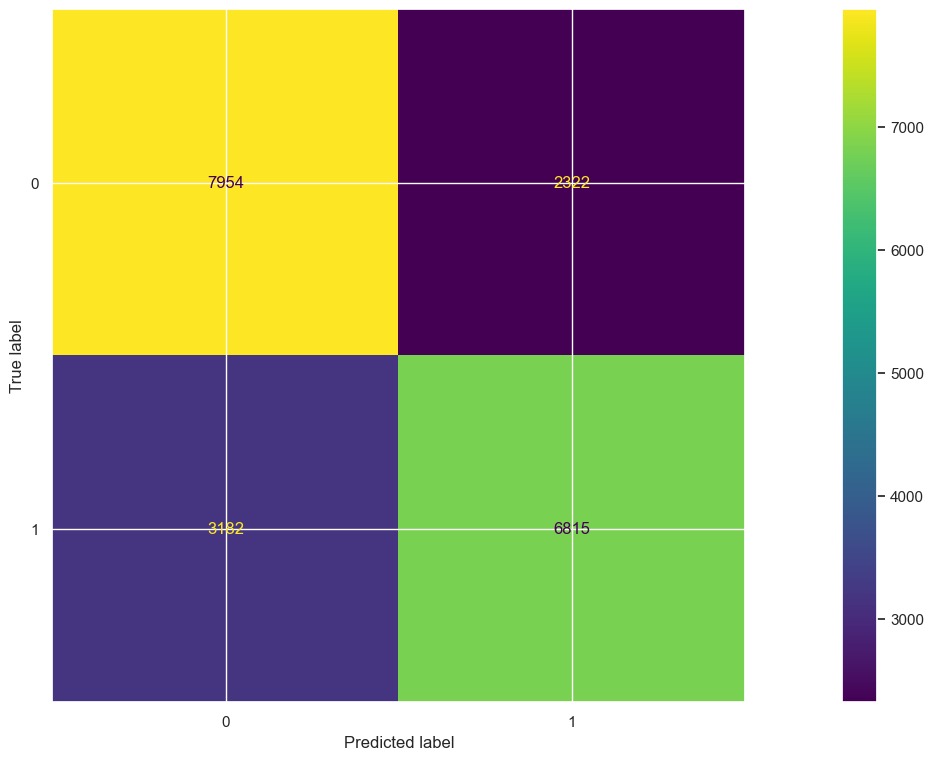

In [81]:
cm = confusion_matrix(y_valid, y_hat)
ConfusionMatrixDisplay(cm).plot();

### 8.7 - LGBMClassifier

In [82]:
mdl = LGBMClassifier().fit(x_train, y_train)
mdl_name = 'LGBMClassifier'
y_hat = mdl.predict(x_valid)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(mdl, x_train, y_train, scoring='precision', cv=cv, n_jobs=-1)

df3_score_lgbmc = metrics_score(y_valid, y_hat, mdl_name)
df3_score_lgbmc['precision_cv'] = mean(n_scores)
df3_score_lgbmc['precision_cv_std'] = std(n_scores)
df3_score_lgbmc

,mdl_name,accuracy,precision,recall,F1_score,precision_cv,precision_cv_std
0,LGBMClassifier,0.733439,0.752169,0.685206,0.717127,0.753126,0.007352


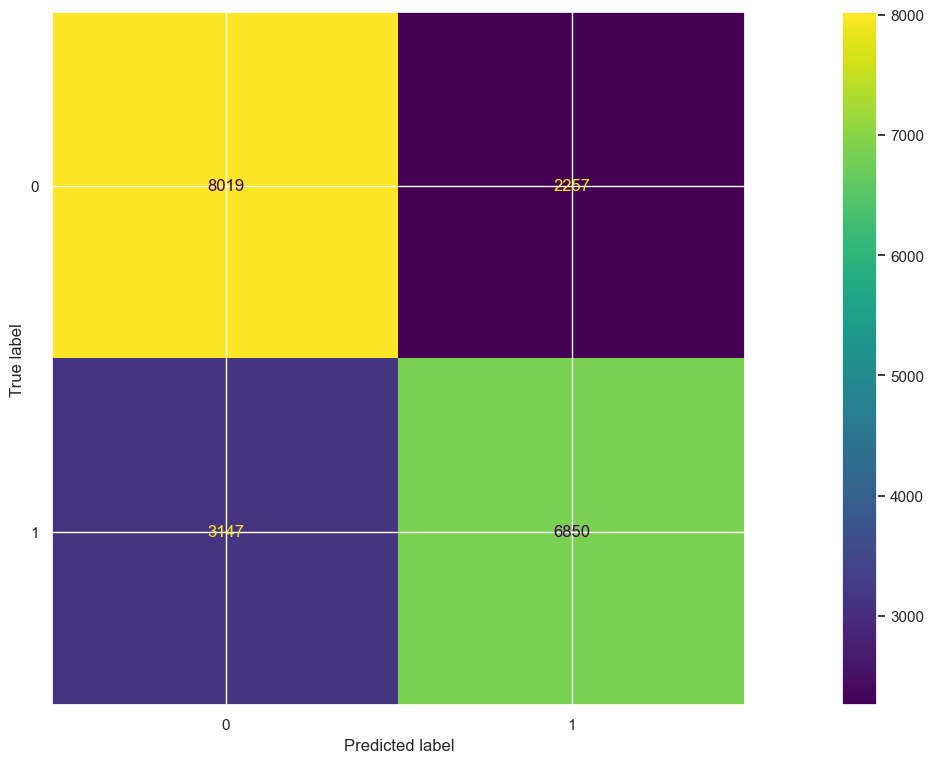

In [83]:
cm = confusion_matrix(y_valid, y_hat)
ConfusionMatrixDisplay(cm).plot();

## 9.0 - Metrics

### 9.1 - Validation

In [84]:
df3_all_scores_sbs = pd.concat([df3_score_rf, df3_score_gbdt, df3_score_lr, df3_score_xgbc, df3_score_knc, df3_score_lgbmc], axis=0).reset_index(drop=True)
df3_all_scores_sbs.style.highlight_max(subset = ["accuracy",'precision','recall','F1_score','precision_cv','precision_cv_std'])

,mdl_name,accuracy,precision,recall,F1_score,precision_cv,precision_cv_std
0,RandomForestClassifier,0.703399,0.701456,0.693808,0.697611,0.701760,0.006129
1,GradientBoostingClassifier,0.734376,0.748170,0.695409,0.720825,0.748368,0.007358
2,LogisticRegression,0.727075,0.753291,0.663999,0.705832,0.752746,0.006040
3,XGBClassifier,0.728506,0.745868,0.681705,0.712345,0.745777,0.007314
4,KNeighborsClassifier,0.728506,0.745868,0.681705,0.712345,0.662284,0.005631
5,LGBMClassifier,0.733439,0.752169,0.685206,0.717127,0.753126,0.007352


## 10.0 - Hyperparameters (HyperOpt)

**Gradient Boosting it's better**

In [85]:
parameters = {'learning_rate':[0.01, 0.08], 
    'n_estimators':[100, 150],
    'subsample':[0.08, 0.1, 0.2, 0.6, 0.7, 0.8, 0.9, 1.0], 
    'min_samples_split':[0.3, 0.6, 0.8, 2, 3, 4],
    'min_samples_leaf':[1, 2, 3, 4], 
    'max_depth':[3, 5, 10, 15, 20, 25]}

In [86]:
#RepeatedStratifiedKFold
MAX_EVALS = 20
df3_hyper = pd.DataFrame(columns=['Mean_precision', 'Std_precision', 'Parameters'])

for i in range(MAX_EVALS):
    print(f'evals: {i}')
    
    hp = {k:sp(v, 1)[0] for k, v in parameters.items()}
    print(f'Hyperparameters: {hp}')
    mdl = GradientBoostingClassifier(
        learning_rate=hp['learning_rate'], n_estimators=hp['n_estimators'],
        subsample=hp['subsample'], min_samples_split=hp['min_samples_split'],
        min_samples_leaf=hp['min_samples_leaf'], max_depth=hp['max_depth'],
        loss='deviance', random_state=42
        ).fit(x_train, y_train)
    print('trained...')
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(mdl, x_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
    print('crossvalidation finished')
    
    df3_cv = pd.DataFrame([[mean(n_scores), std(n_scores), hp]], 
                        columns=['Mean_precision', 'Std_precision', 'Parameters'])
    
    print(df3_cv)
    df3_hyper = pd.concat([df3_hyper, df3_cv], axis=0)
    
df3_hyper

evals: 0
Hyperparameters: {'learning_rate': 0.08, 'n_estimators': 100, 'subsample': 0.8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
trained...
crossvalidation finished
   Mean_precision  Std_precision                                         Parameters
0        0.752309       0.005141  {'learning_rate': 0.08, 'n_estimators': 100, '...
evals: 1
Hyperparameters: {'learning_rate': 0.08, 'n_estimators': 100, 'subsample': 0.2, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 20}
trained...
crossvalidation finished
   Mean_precision  Std_precision                                         Parameters
0        0.691731       0.003052  {'learning_rate': 0.08, 'n_estimators': 100, '...
evals: 2
Hyperparameters: {'learning_rate': 0.08, 'n_estimators': 100, 'subsample': 0.7, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 15}
trained...
crossvalidation finished
   Mean_precision  Std_precision                                         Parameters
0        0.706

,Mean_precision,Std_precision,Parameters
0,0.752309,0.005141,"{'learning_rate': 0.08, 'n_estimators': 100, '..."
0,0.691731,0.003052,"{'learning_rate': 0.08, 'n_estimators': 100, '..."
0,0.706138,0.004256,"{'learning_rate': 0.08, 'n_estimators': 100, '..."
0,0.689085,0.005093,"{'learning_rate': 0.08, 'n_estimators': 100, '..."
0,0.755331,0.005399,"{'learning_rate': 0.01, 'n_estimators': 150, '..."
0,0.000000,0.000000,"{'learning_rate': 0.08, 'n_estimators': 150, '..."
0,0.686458,0.004533,"{'learning_rate': 0.08, 'n_estimators': 150, '..."
0,0.753546,0.003887,"{'learning_rate': 0.01, 'n_estimators': 150, '..."
0,0.746776,0.003851,"{'learning_rate': 0.08, 'n_estimators': 150, '..."
0,0.691972,0.002887,"{'learning_rate': 0.01, 'n_estimators': 150, '..."


## 11.0 - Final Model

In [87]:
learning_rate= 0.01
n_estimators= 150
subsample= 0.9
min_samples_split= 4
min_samples_leaf= 1
max_depth=5


In [88]:
final_model = GradientBoostingClassifier(
        learning_rate=learning_rate, n_estimators=n_estimators,
        subsample=subsample, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,max_depth=max_depth,
        loss='deviance', random_state=42
        ).fit(x_train, y_train)


pickle.dump(final_model, open(r'C:\Users\Utente77\repos\cardio_catch_disease_PA001\model\model_trained.pkl', 'wb'))

## 12.0 - Business Performance

|                                            | Avg Precision             | 
|--------------------------------------------|---------------------------|
| Gradient Boosting Classifier (Tuned HP)               | 0.756197 (+/- 0.005722) | 



In [94]:
cost_status_quo = 1000                         ## cost of each diagnostic with operators and machines
percentual_status_quo = (0.55+0.65)/2
print(percentual_status_quo)
revenue_status_quo = int((percentual_status_quo - 0.50)/0.05) * 500
print(revenue_status_quo)

result_status_quo = revenue_status_quo - cost_status_quo

cost_future = 0
standard = 0.005722
percent_max=0.756197+0.005722
print(percent_max)
percent_min=0.756197-0.005722
print(percent_min)
percentual_future = (percent_min+percent_max)/2
revenue_future = int((percentual_future - 0.50)/0.05) * 500  
result_model_future = (revenue_future - cost_future)*70000   
final=result_model_future-result_status_quo

0.6000000000000001
1000
0.761919
0.750475


In [96]:
print(result_status_quo)
print(result_model_future)
print(final)

0
175000000
175000000


In [91]:
bp=pd.DataFrame(pd.concat([pd.Series(result_status_quo), pd.Series(result_model_future)])).T
bp.columns=['status_quo','result_model']
bp

,status_quo,result_model
0,0,2500


Let's recap the pricing model. The price of the diagnosis, paid by the client, varies according to the precision achieved by the team of specialists.

| Exam Accuracy | Price          | Rules                                    | Example                         |
|:--------------|:---------------|:-----------------------------------------|:--------------------------------|
| Above 50%     | min \$500\.00  | \+\$500 for each additional 5% precision | Precision = 55% \-> \$1,000\.00 |
| Up to 50%     | $0\.00         | N/A                                      | N/A                             |


Our full original data set contains the records of 70,000 patients. Suppose we were to make them go through the clinic procedure to check if they have a cardiovascular disease, our model have reached a **precision** that ranges **from 0.75% to 0.76%**, which is higher than the 55% to 65% that we have on today's procedures. Thus, translating it to business numbers.

|                        | Average             | 
|:-----------------------|------------------:|
| Our model (TO BE)      | \$175,000,000  | 
| Today (AS IS)          | \$105,000,000  | 


This means that having a portfolio of 70k patients that would go through the clinical procedure to check whether they have or not a cardiovascular disease, in the **worst business scenario** the portfolio would generate a profit of **\\$171.7 million** and in the **best scenario \$186.2 million**, in contrast to today's procedure that at its best has an accuracy of 65% and would generate a total of \\$105 million, that's **a difference of \\$70.0 million (an increase of 77.3%)!**

## 13.0 - Deploy

### 13.1 - Class

In [240]:
import pandas as pd
import numpy as np
import json
import pickle

# this file will be a handler "API"
class Cardio_Catch_Diseases(object):
    def __init__(self):
        self.home_path              = '/home/python/Documents/Projects/pa001_cardio_catch_diseases/'
        self.age_scaling            = pickle.load(open(self.home_path + 'parameters/age_scaling.pkl', 'rb'))
        self.bmi_scaling            = pickle.load(open(self.home_path + 'parameters/bmi_scaling.pkl', 'rb'))
        self.difference_scaling     = pickle.load(open(self.home_path + 'parameters/difference_scaling.pkl', 'rb'))
        self.height_scaling         = pickle.load(open(self.home_path + 'parameters/height_scaling.pkl', 'rb'))
        self.hight_pressure_scaling = pickle.load(open(self.home_path + 'parameters/hight_pressure_scaling.pkl', 'rb'))
        self.low_pressure_scaling   = pickle.load(open(self.home_path + 'parameters/low_pressure_scaling.pkl', 'rb'))
        self.weight_scaling         = pickle.load(open(self.home_path + 'parameters/weight_scaling.pkl', 'rb'))
        self.gender_encoder         = pickle.load(open(self.home_path + 'parameters/gender_scaling.pkl', 'rb'))


    
    def data_cleaning(self, df3):
        '''df3: is the input data from user on website'''


        # height - change centimeters to meters
        df3['height'] = (df3['height'] / 100)

        return df3

    def feature_engineering(self, df3):
        '''Get the dataframe from data cleaning and create a new features'''


        # feature engineering
        df3['difference'] = df3['hight_pressure'] - df3['low_pressure']
        df3['convergent'] = df3['difference'].apply(lambda x: 1 if x <= 30 else 0)
        df3['divergent'] = df3['difference'].apply(lambda x: 1 if x >= 60 else 0)
        df3['bmi'] = (df3['weight']/(df3['height'] * df3['height']))
        df3['bmi_level'] = df3['bmi'].apply(lambda x: 
                                                      'underweight' if x <= 18.5 else
                                                      'normal'      if x >  18.5 and x <= 24.9 else
                                                      'overweight'  if x >= 25.0 and x <= 29.9 else
                                                      'obesity')
        df3['hypertension'] = df3.apply(lambda x: 1 if x[4] >=140 and x[5] >= 90 else 0, axis=1)
        df3['hypotension'] = df3.apply(lambda x: 1 if x[4] <=90 and x[5] <= 60 else 0, axis=1)
        df3['age_range'] = df3['age'].apply(lambda x: 'age_0_50'    if x <= 50 
                                                           else 'age_51_59'   if x >= 51 and x <= 59 
                                                           else 'age_60_over' if x >= 60 
                                                           else x)

        df3['weight_range'] = df3['weight'].apply(
            lambda x:   0.50 if x <= 50  else
                        0.75 if x >= 51  and x <= 75 else
                        1.00 if x >= 76  and x <= 100 else
                        1.25 if x >= 101 and x <= 125 else
                        1.50 if x >= 126 and x <= 150 else
                        1.75 if x >= 151 and x <= 175 else 2.00)

        # Data Filtering rows, values or columns
        df3 = df3.drop('id', axis=1)

        return df3


    def data_rescaling(self, df3):
        '''
        Rescaling data
        Return: json file with x_test data to input the prediction
        '''


        # Transforming data to will be in correct data scaler to input at model
        df3['age']            = self.age_scaling.transform(df3[['age']].values)
        df3['height']         = self.height_scaling.transform(df3[['height']].values)
        df3['weight']         = self.weight_scaling.transform(df3[['weight']].values)
        df3['low_pressure']   = self.low_pressure_scaling.transform(df3[['low_pressure']].values)
        df3['hight_pressure'] = self.hight_pressure_scaling.transform(df3[['hight_pressure']].values)
        df3['difference']     = self.difference_scaling.transform(df3[['difference']].values)
        df3['bmi']            = self.bmi_scaling.transform(df3[['bmi']].values)
        df3['gender']         = self.gender_scaling.transform(df3[['gender']].values)
        df3['age_range']      = df3['age_range'].map(
            {'age_0_50':1, 'age_51_59':1, 'age_60_over':3})
        df3['bmi_level']      = df3['bmi_level'].map(
            {'underweight':1, 'normal':2, 'overweight':3, 'obesity':4})

        # Deleting target
        x_test = df3.drop('cardio', axis=1).copy()
        #data_json = json.dumps(x_test.to_dict(orient='records')) # converto to json

        return x_test

### 13.2 - Input Simulation

In [241]:
import pandas as pd

def input_simulation():
    # inputs from user
    
    age = input('age: ')
    gender = int(input('gender: '))
    height = int(input('height: '))
    weight = float(input('weight: '))
    ap_hi = int(input('hight_pressure: '))
    ap_lo = int(input('low_pressure: '))
    cholesterol = int(input('cholesterol (1,2 or 3): '))
    gluc = int(input('glucose (1,2 or 3): '))
    smoke = int(input('smoker: '))
    alco = int(input('alcohol: '))
    active = input('active: ')

    # replacing columns names
    new_col = ['id', 'age', 'gender', 'height', 'weight', 'hight_pressure', 'low_pressure',
               'cholesterol', 'glucose', 'smoker', 'alcohol', 'active', 'cardio']

    # getting data and converting to dataframe
    df3_inputed = [[1, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, 0,]]
    df3 = pd.DataFrame(df3_inputed, columns=new_col)

    # datatypes transformations
    df3['age'] = df3['age'].astype('int64')
    df3['gender'] = df3['gender'].astype('int64')
    df3['height'] = df3['height'].astype('int64')
    df3['weight'] = df3['weight'].astype('float64')
    df3['hight_pressure'] = df3['hight_pressure'].astype('int64') 
    df3['low_pressure'] = df3['low_pressure'].astype('int64') 
    df3['cholesterol'] = df3['cholesterol'].astype('int64')
    df3['glucose'] = df3['glucose'].astype('int64')
    df3['smoker'] = df3['smoker'].astype('int64') 
    df3['alcohol'] = df3['alcohol'].astype('int64')
    df3['active'] = df3['active'].astype('int64')
    df3['cardio'] = df3['cardio'].astype('int64')

    return json.dumps(df3.to_dict(orient='records'))

### 13.3 - API / Handler

In [242]:
import pickle
import pandas as pd
import numpy as np
from flask import Flask, request, Response
from ccd.ccd import Cardio_Catch_Diseases
import json

# loading model trained from pickle file
with open('/home/python/Documents/Projects/pa001_cardio_catch_diseases/model/model_trained.pkl', 'rb') as file:
    model = pickle.load(file)

# initialized API
app = Flask(__name__)

@app.route('/ccd/predict', methods=['POST'])
def ccd_predict():
    '''
    ccd: Cardio Catch Diseases
    This function it will be create the API request, where the user will be input the user data that 
    will used to data_cleaning(), data_engineering(), data_scaler() 
    this functions will be return the dataframe 'x_est', that will be used to predict
    Return: Prediction "array"
    '''
    
    test_json = request.get_json()
        
    if test_json:
        if isinstance(test_json, dict): # Unique Example
            test_raw = pd.DataFrame(test_json, index=[0])
        else: # multiple Example
            test_raw = pd.DataFrame(test_json, columns=test_json[0].keys())

        # Instantiate CCD class
        pipeline = Cardio_Catch_Diseases()
        # cleaning data
        test_raw_cleaned = pipeline.data_cleaning(test_raw)
        # creating derivates to new features
        test_raw_features = pipeline.feature_engineering(test_raw_cleaned)        
        
        # preparing data to model
        test_raw_selected = pipeline.data_rescaling(test_raw_features)
        
        y_hat = model.predict(test_raw_selected)
        test_raw['prediction'] = y_hat.copy()
        return test_raw.to_json(orient='records')
    
    else:
        return Response( "{}", status=200, mimetype='application/json')

    
if __name__=='__main__':
    app.run('0.0.0.0')

ModuleNotFoundError: No module named 'flask'

### 13.4 - API Request Tester

In [ ]:
import requests

# Input data user
data = input_simulation()

# API request
url = "https://ccd-model.herokuapp.com/ccd/predict"
header = {'Content-type': 'application/json'}

response_ccd = requests.post(url, data=data, headers=header)
print(f'Status Code: {response_ccd.status_code}')

df3_response = pd.DataFrame(response_ccd.json(), columns=response_ccd.json()[0].keys())

# Loading json to Dataframe
df3_new = pd.DataFrame(json.loads(data))

# converting to back the original datatype
df3_new['age'] = df3_new['age'] * 365

# getting prediction
df3_new['cardio'] = df3_response['cardio'].copy()

# getting current time in seconds since the Epoch.
# convert to normal date use time.ctime(time.time())
df3_new['id'] = time.time()

# Insert into database
insert_database_values(df3_new)

df3_response

## 14.0 - Dashboard - PowerBI

In [ ]:
# Connecting sqlite database
import pandas as pd
from sqlalchemy import create_engine

new_col = ['id', 'age', 'gender', 'height', 'weight', 'hight_pressure', 'low_pressure',
           'cholesterol', 'glucose', 'smoker', 'alcohol', 'active', 'cardio']

engine = create_engine('sqlite:///Y:\\pa001_cardio_catch_diseases\\ccd.db', echo=False)
df3 = engine.execute('SELECT * FROM patients').fetchall()
df3 = pd.DataFrame(df3, columns=new_col)

# Data Preparation/transformation

